In [1]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
sns.set_style("whitegrid")


In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, steps):
    X, y = list(), list()
    for start in range(len(sequence)):
        # define the end index of sequence
        end_index = start + steps
        # to check if end_index stays in the allowable limit
        if end_index > len(sequence)-1:
          break
        # extract input and output parts of the sequence
        sequence_x, sequence_y = sequence[start : end_index], sequence[end_index]
        X.append(sequence_x)
        y.append(sequence_y)
    return array(X), array(y)


In [3]:
# get Data From CSV File 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
OCHL = ['Open', 'Close', 'High', 'Low']
OCHLV = ['Open', 'Close', 'High', 'Low', 'Volume']

In [5]:
# Read Data From CSV Files 
# there are three data sets for the Stocks from IT sector called TCS, Infosys and NIFTY IT
tcs_data = pd.read_csv('tcs_stock.csv')
pd.concat([tcs_data.head(),tcs_data.tail()])

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/01/2015,TCS,EQ,2558.25,2567.00,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674340e+13,8002,52870,0.2883
1,2/01/2015,TCS,EQ,2545.55,2551.00,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,5/01/2015,TCS,EQ,2579.45,2581.00,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248890e+14,43234,456728,0.5207
3,6/01/2015,TCS,EQ,2540.25,2529.10,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989620e+14,84503,714306,0.5894
4,7/01/2015,TCS,EQ,2446.60,2470.00,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208360e+14,101741,886368,0.6724
243,24/12/2015,TCS,EQ,2425.80,2421.00,2438.20,2404.00,2435.00,2434.25,2424.03,421580,1.021920e+14,21932,188670,0.4475
244,28/12/2015,TCS,EQ,2434.25,2428.00,2466.40,2420.20,2456.95,2462.70,2455.00,1852099,4.546900e+14,43390,1060100,0.5724
245,29/12/2015,TCS,EQ,2462.70,2458.35,2465.30,2445.75,2449.35,2455.80,2452.26,854262,2.094880e+14,26975,433986,0.5080
246,30/12/2015,TCS,EQ,2455.80,2453.05,2459.00,2412.30,2421.70,2418.30,2442.06,802881,1.960680e+14,49464,632180,0.7874
247,31/12/2015,TCS,EQ,2418.30,2415.75,2448.50,2407.50,2430.00,2436.85,2428.90,620159,1.506300e+14,42600,400391,0.6456


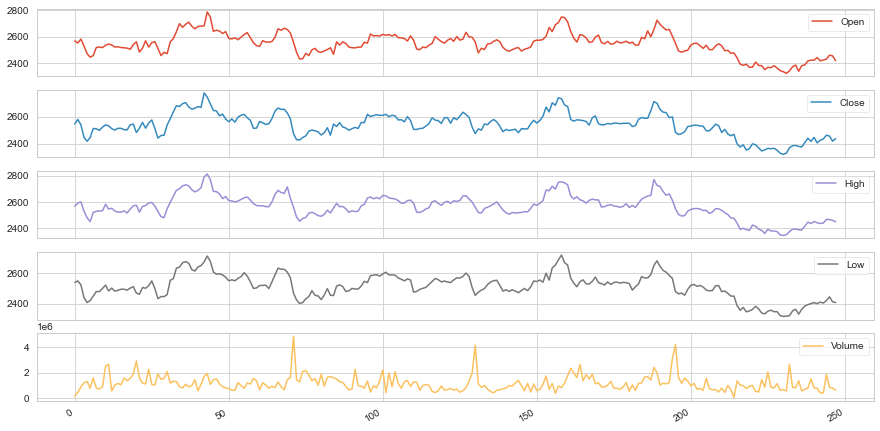

In [6]:
tcs_data[OCHLV].plot(legend=True,subplots=True, figsize = (15, 8))
plt.show()

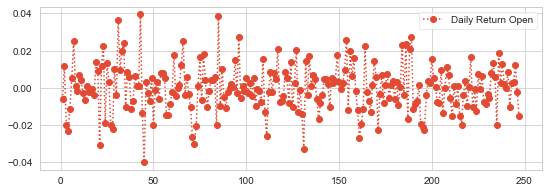

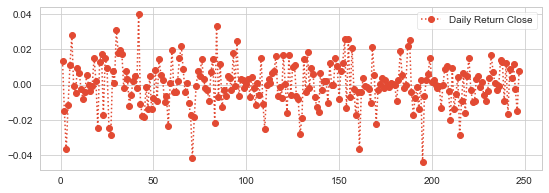

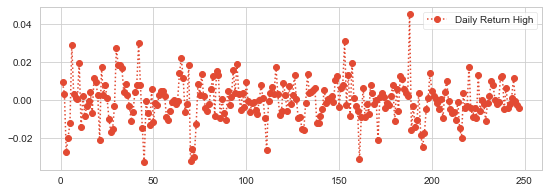

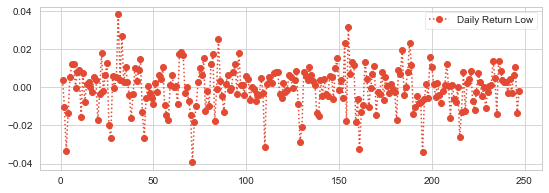

In [7]:
for x in OCHL:
    tcs_data['Daily Return '+x] = tcs_data[x].pct_change()
    # plot the daily return percentage
    tcs_data['Daily Return '+x].plot(figsize=(9,3),legend=True,linestyle=':',marker='o')
    plt.show()

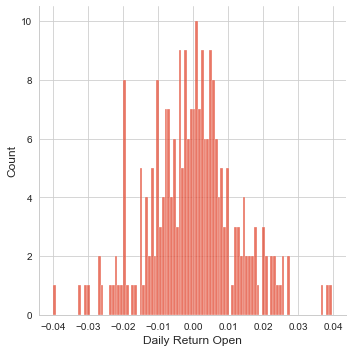

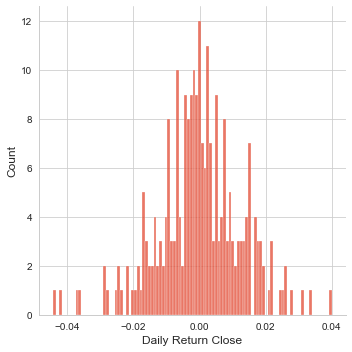

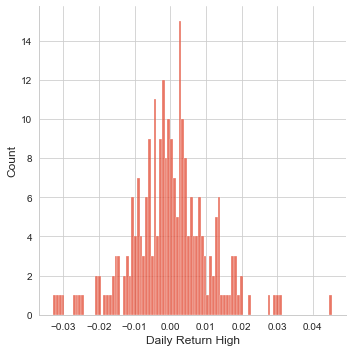

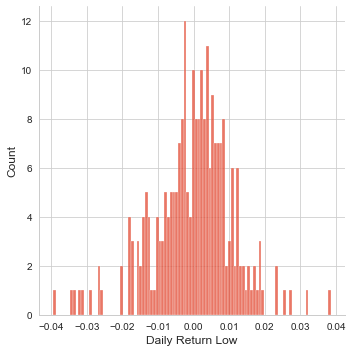

In [8]:
sns.displot(tcs_data['Daily Return Open'], bins=100)
sns.displot(tcs_data['Daily Return Close'], bins=100)
sns.displot(tcs_data['Daily Return High'],bins=100)
sns.displot(tcs_data['Daily Return Low'], bins=100)
plt.show()


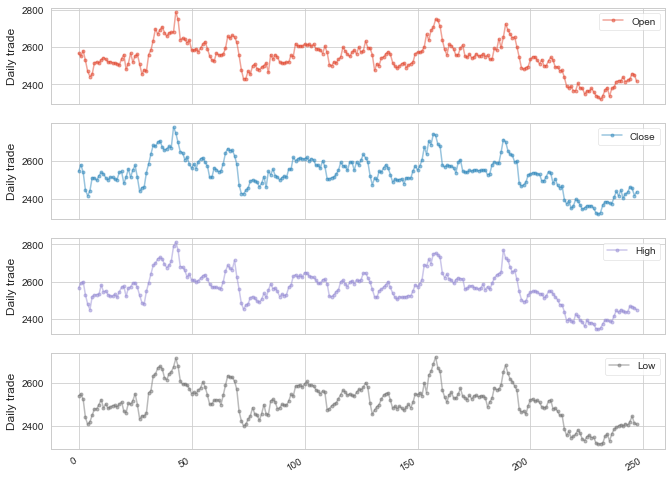

In [9]:
axes = tcs_data[OCHL].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [10]:
infosys_data = pd.read_csv('infy_stock.csv')
pd.concat([infosys_data.head(),infosys_data.tail()])

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/01/2015,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870310e+13,14908,258080,0.5154
1,2/01/2015,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394670e+14,54166,1249104,0.7371
2,5/01/2015,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979910e+14,82694,1830962,0.7370
3,6/01/2015,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724460e+14,108209,1772070,0.7332
4,7/01/2015,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557160e+14,62463,1317720,0.7270
243,24/12/2015,INFY,EQ,1100.85,1102.05,1104.45,1090.1,1095.80,1096.35,1095.84,615027,6.739700e+13,20528,294731,0.4792
244,28/12/2015,INFY,EQ,1096.35,1090.00,1110.00,1090.0,1103.80,1104.75,1105.51,2763476,3.055050e+14,51103,1880078,0.6803
245,29/12/2015,INFY,EQ,1104.75,1101.25,1110.00,1097.3,1103.00,1104.70,1104.14,1672531,1.846710e+14,52409,967577,0.5785
246,30/12/2015,INFY,EQ,1104.70,1101.10,1106.60,1083.0,1088.00,1086.30,1094.45,2576985,2.820380e+14,65379,1754378,0.6808
247,31/12/2015,INFY,EQ,1086.30,1090.15,1109.95,1087.0,1107.00,1105.40,1102.09,3971969,4.377470e+14,75143,2641827,0.6651


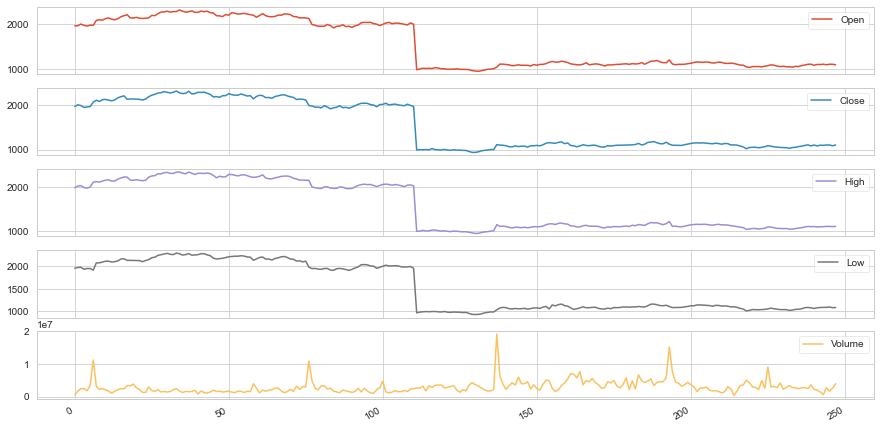

In [11]:
infosys_data[OCHLV].plot(legend=True,subplots=True, figsize = (15, 8))
plt.show()

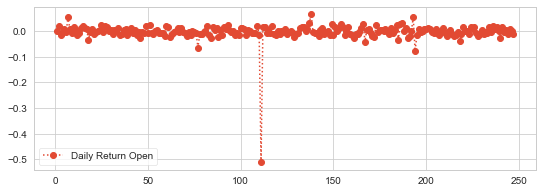

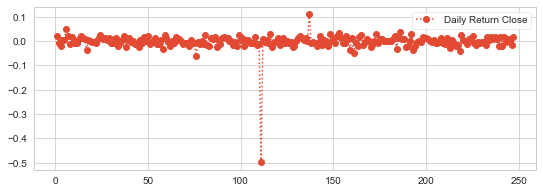

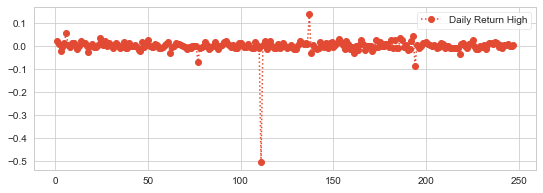

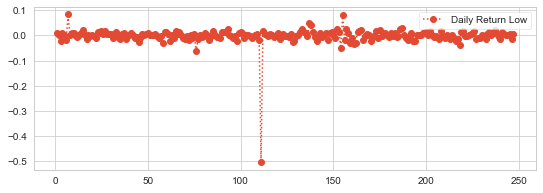

In [12]:
for x in OCHL:
    infosys_data['Daily Return '+x] = infosys_data[x].pct_change()
    # plot the daily return percentage
    infosys_data['Daily Return '+x].plot(figsize=(9,3),legend=True,linestyle=':',marker='o')
    plt.show()


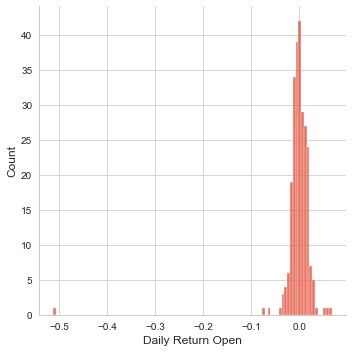

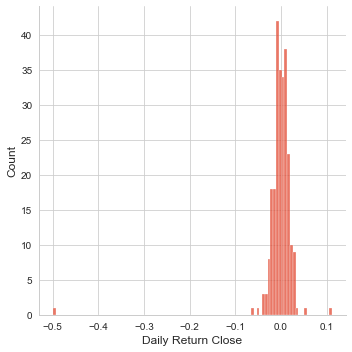

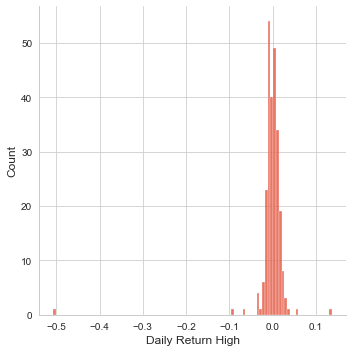

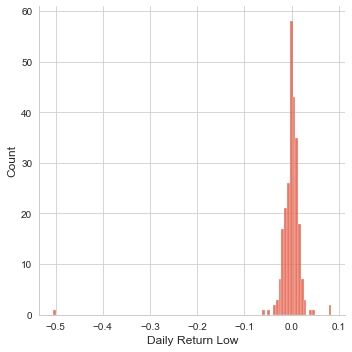

In [13]:
sns.displot(infosys_data['Daily Return Open'], bins=100)
sns.displot(infosys_data['Daily Return Close'], bins=100)
sns.displot(infosys_data['Daily Return High'],bins=100)
sns.displot(infosys_data['Daily Return Low'], bins=100)
plt.show()

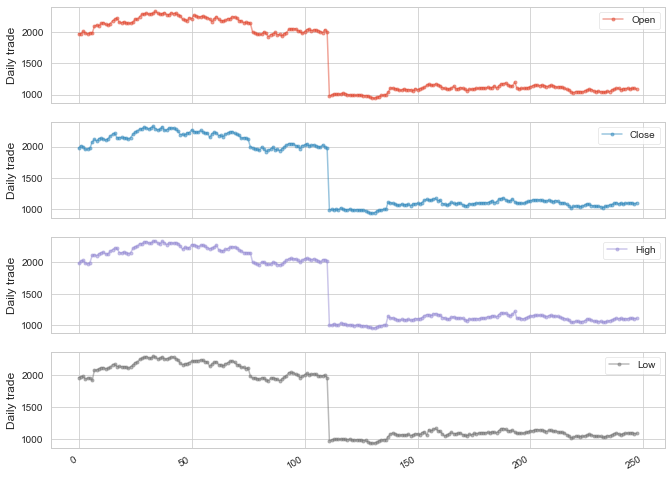

In [14]:
axes = infosys_data[OCHL].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [15]:
nifty_it_data = pd.read_csv('nifty_it_index.csv')
pd.concat([nifty_it_data.head(),nifty_it_data.tail()])

,Date,Open,High,Low,Close,Volume,Turnover
0,1/01/2015,11214.80,11235.75,11166.35,11215.70,4246150,3575100000
1,2/01/2015,11214.65,11399.10,11214.65,11372.10,10004862,9645600000
2,5/01/2015,11369.35,11433.75,11186.95,11248.55,8858018,10590000000
3,6/01/2015,11186.10,11186.10,10909.00,10959.90,12515739,13645000000
4,7/01/2015,11013.20,11042.35,10889.55,10916.00,10976356,12034400000
243,24/12/2015,11193.25,11197.50,11152.85,11184.90,2927864,3182700000
244,28/12/2015,11152.70,11303.05,11146.85,11271.80,8055590,10019000000
245,29/12/2015,11257.05,11287.50,11206.60,11253.45,6024174,6626200000
246,30/12/2015,11247.35,11263.60,11100.10,11117.60,6564991,7071900000
247,31/12/2015,11113.00,11233.85,11113.00,11212.55,8197040,8590500000


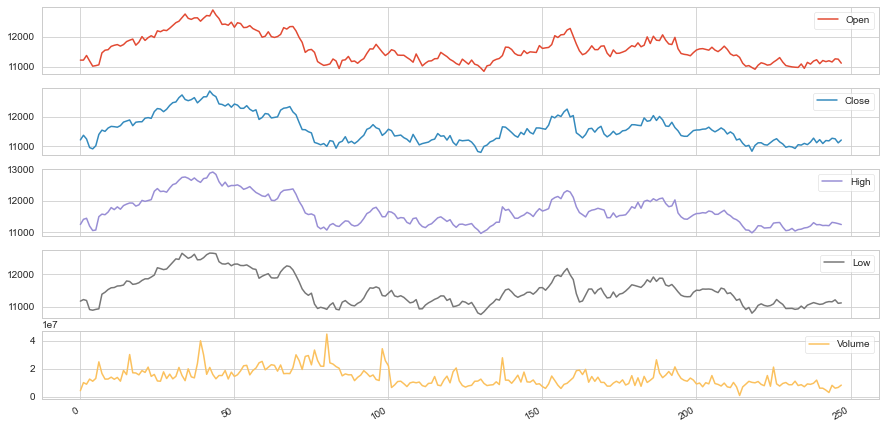

In [16]:
nifty_it_data[OCHLV].plot(legend=True,subplots=True, figsize = (15, 8))
plt.show()


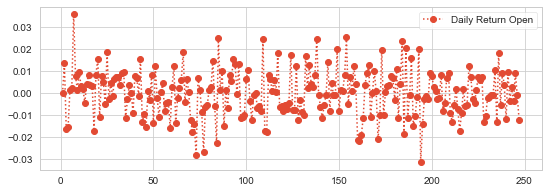

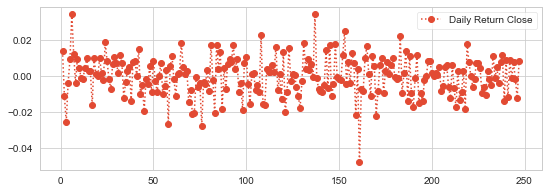

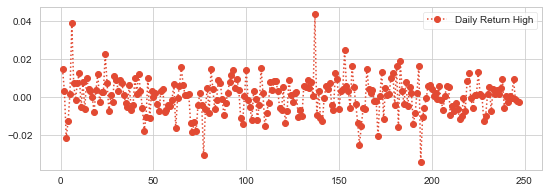

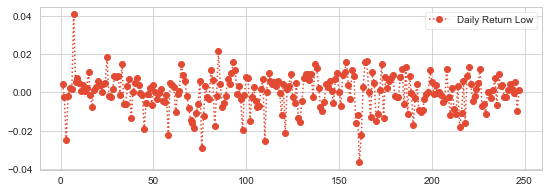

In [17]:
for x in OCHL:
    nifty_it_data['Daily Return '+x] = nifty_it_data[x].pct_change()
    # plot the daily return percentage
    nifty_it_data['Daily Return '+x].plot(figsize=(9,3),legend=True,linestyle=':',marker='o')
    plt.show()

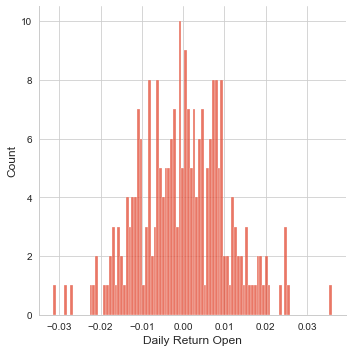

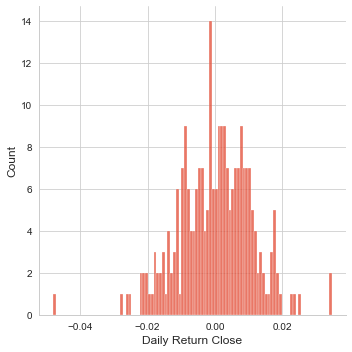

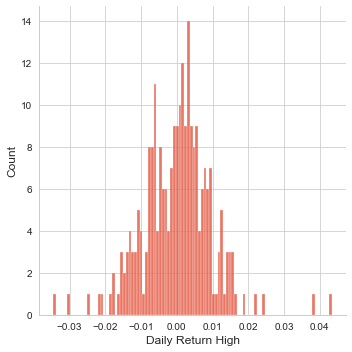

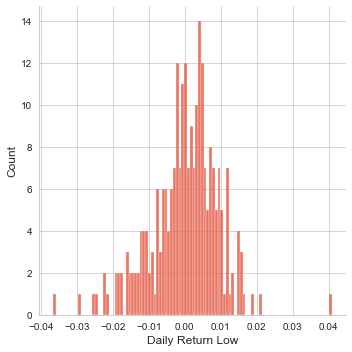

In [18]:
sns.displot(nifty_it_data['Daily Return Open'], bins=100)
sns.displot(nifty_it_data['Daily Return Close'], bins=100)
sns.displot(nifty_it_data['Daily Return High'],bins=100)
sns.displot(nifty_it_data['Daily Return Low'], bins=100)
plt.show()

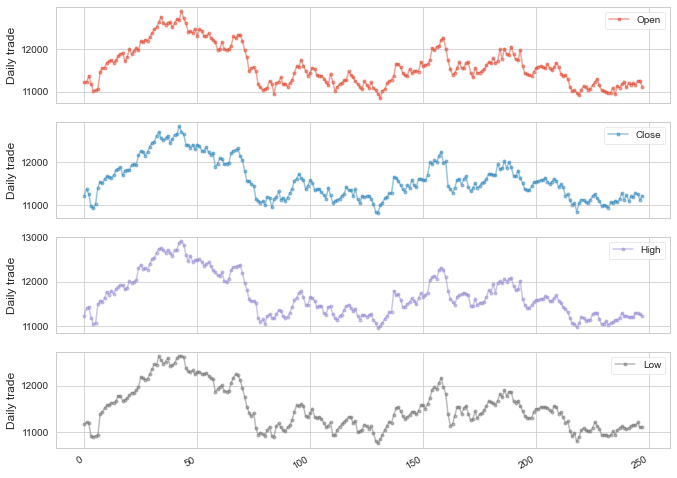

In [19]:
axes = nifty_it_data[OCHL].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [20]:
# information fo the data
# and check EDA for the data for more information while its contains the null information of missing values ?
#  having bad perdiction if we have wrong data or null values 
#  also printing the decription for the data, coz it is containing the data type of data whether it is object or float which is very important
#  Checking NULL values 
print(tcs_data.info())
print(tcs_data.describe())
print(tcs_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                248 non-null    object 
 1   Symbol              248 non-null    object 
 2   Series              248 non-null    object 
 3   Prev Close          248 non-null    float64
 4   Open                248 non-null    float64
 5   High                248 non-null    float64
 6   Low                 248 non-null    float64
 7   Last                248 non-null    float64
 8   Close               248 non-null    float64
 9   VWAP                248 non-null    float64
 10  Volume              248 non-null    int64  
 11  Turnover            248 non-null    float64
 12  Trades              248 non-null    int64  
 13  Deliverable Volume  248 non-null    int64  
 14  %Deliverble         248 non-null    float64
 15  Daily Return Open   247 non-null    float64
 16  Daily Re

In [21]:
# information fo the data
# and check EDA for the data for more information while its contains the null information of missing values ?
#  having bad perdiction if we have wrong data or null values 
#  also printing the decription for the data, coz it is containing the data type of data whether it is object or float which is very important
#  Checking NULL values 
print(infosys_data.info())
print(infosys_data.describe())
print(infosys_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                248 non-null    object 
 1   Symbol              248 non-null    object 
 2   Series              248 non-null    object 
 3   Prev Close          248 non-null    float64
 4   Open                248 non-null    float64
 5   High                248 non-null    float64
 6   Low                 248 non-null    float64
 7   Last                248 non-null    float64
 8   Close               248 non-null    float64
 9   VWAP                248 non-null    float64
 10  Volume              248 non-null    int64  
 11  Turnover            248 non-null    float64
 12  Trades              248 non-null    int64  
 13  Deliverable Volume  248 non-null    int64  
 14  %Deliverble         248 non-null    float64
 15  Daily Return Open   247 non-null    float64
 16  Daily Re

In [22]:
# information fo the data
# and check EDA for the data for more information while its contains the null information of missing values ?
#  having bad perdiction if we have wrong data or null values 
#  also printing the decription for the data, coz it is containing the data type of data whether it is object or float which is very important
#  Checking NULL values 
print(nifty_it_data.info())
print(nifty_it_data.describe())
print(nifty_it_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                248 non-null    object 
 1   Open                248 non-null    float64
 2   High                248 non-null    float64
 3   Low                 248 non-null    float64
 4   Close               248 non-null    float64
 5   Volume              248 non-null    int64  
 6   Turnover            248 non-null    int64  
 7   Daily Return Open   247 non-null    float64
 8   Daily Return Close  247 non-null    float64
 9   Daily Return High   247 non-null    float64
 10  Daily Return Low    247 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 21.4+ KB
None
               Open          High           Low         Close        Volume  \
count    248.000000    248.000000    248.000000    248.000000  2.480000e+02   
mean   11601.495968  11673.75625

# TCS Data Split in to Open Close High and Low 
# list for process for split 

In [23]:
# Split data of tcs in open close high and low different series 
tcs_open_raw_sequence = tcs_data['Open'].tolist()
tcs_close_raw_sequence = tcs_data['Close'].tolist()
tcs_high_raw_sequence = tcs_data['High'].tolist()
tcs_low_raw_sequence = tcs_data['Low'].tolist()

# Inforsys Data Split in to Open Close High and Low 
# list for process for split 

In [24]:
# Split data of infosys in open close high and low different series 
infosys_open_raw_sequence = infosys_data['Open'].tolist()
infosys_close_raw_sequence = infosys_data['Close'].tolist()
infosys_high_raw_sequence = infosys_data['High'].tolist()
infosys_low_raw_sequence = infosys_data['Low'].tolist()

# Nifty Index data split in to Open Close High and low
## list for process for split ahead

In [25]:
# Split data of infosys in open close high and low different series 
niftyit_open_raw_sequence = nifty_it_data['Open'].tolist()
niftyit_close_raw_sequence = nifty_it_data['Close'].tolist()
niftyit_high_raw_sequence = nifty_it_data['High'].tolist()
niftyit_low_raw_sequence = nifty_it_data['Low'].tolist()

In [26]:
steps = 3
X1, y1 = split_sequence(tcs_open_raw_sequence, steps)
X2, y2 = split_sequence(tcs_close_raw_sequence, steps)
X3, y3 = split_sequence(tcs_high_raw_sequence, steps)
X4, y4 = split_sequence(tcs_low_raw_sequence, steps)
X5, y5 = split_sequence(infosys_open_raw_sequence, steps)
X6, y6 = split_sequence(infosys_close_raw_sequence, steps)
X7, y7 = split_sequence(infosys_high_raw_sequence, steps)
X8, y8 = split_sequence(infosys_low_raw_sequence, steps)
X9, y9 = split_sequence(niftyit_open_raw_sequence, steps)
X10, y10 = split_sequence(niftyit_close_raw_sequence, steps)
X11, y11 = split_sequence(niftyit_high_raw_sequence, steps)
X12, y12 = split_sequence(niftyit_low_raw_sequence, steps)


In [27]:
# reshape 2D input data to 3D input data
features = 1
X1 = X1.reshape((X1.shape[0], X1.shape[1], features))
X2 = X2.reshape((X2.shape[0], X2.shape[1], features))
X3 = X3.reshape((X3.shape[0], X3.shape[1], features))
X4 = X4.reshape((X4.shape[0], X4.shape[1], features))
X5 = X5.reshape((X5.shape[0], X5.shape[1], features))
X6 = X6.reshape((X6.shape[0], X6.shape[1], features))
X7 = X7.reshape((X7.shape[0], X7.shape[1], features))
X8 = X8.reshape((X8.shape[0], X8.shape[1], features))
X9 = X9.reshape((X9.shape[0], X9.shape[1], features))
X10 = X10.reshape((X10.shape[0], X10.shape[1], features))
X11 = X11.reshape((X11.shape[0], X11.shape[1], features))
X12 = X12.reshape((X12.shape[0], X12.shape[1], features))

In [28]:
print(X1.shape)
print(y1.shape)

(245, 3, 1)
(245,)


In [29]:
# Defining model Architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps,
features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 6,793
Trainable params: 6,793
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit model# fit model
history = model.fit(X1, y1, epochs=40, validation_data=(X1, y1), batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
7/7 [==============================] - 30s 216ms/step - loss: 4780846.0625 - mse: 4780846.0625 - mae: 2178.2296 - val_loss: 2612074.0000 - val_mse: 2612073.7500 - val_mae: 1614.9917
Epoch 2/40
7/7 [==============================] - 0s 12ms/step - loss: 2157544.8594 - mse: 2157544.7344 - mae: 1459.0016 - val_loss: 860671.0625 - val_mse: 860671.0625 - val_mae: 926.4530
Epoch 3/40
7/7 [==============================] - 0s 12ms/step - loss: 625686.0000 - mse: 625686.0000 - mae: 775.1549 - val_loss: 78911.3359 - val_mse: 78911.3359 - val_mae: 277.4524
Epoch 4/40
7/7 [==============================] - 0s 13ms/step - loss: 40527.3948 - mse: 40527.3948 - mae: 174.7916 - val_loss: 47802.6641 - val_mse: 47802.6641 - val_mae: 213.4309
Epoch 5/40
7/7 [==============================] - 0s 13ms/step - loss: 71997.0645 - mse: 71997.0645 - mae: 260.9804 - val_loss: 101351.5781 - val_mse: 101351.5781 - val_mae: 314.5873
Epoch 6/40
7/7 [==============================] - 0s 12ms/step - loss: 8

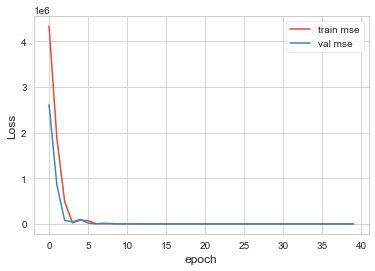

In [31]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

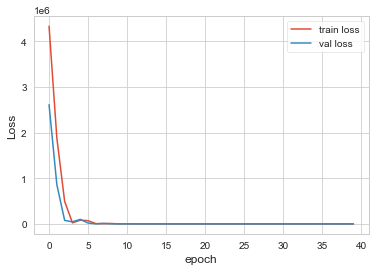

In [32]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

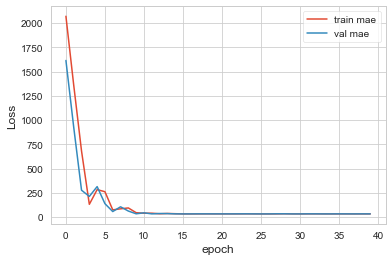

In [33]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()


In [34]:
n_future = 90
y_pred = model.predict(X1[-n_future:])
print("**************************************************************")
print(y_pred.shape)
print("**************************************************************")

**************************************************************
(90, 1)
**************************************************************


In [35]:
y_pred_future = [x.item(0) for x in y_pred]

In [36]:
tcs_Dates = tcs_data['Date']
future_dates = pd.date_range(list(tcs_Dates)[-1], periods=n_future, freq='1d')
forcast_dates = []
for time_i in future_dates:
    forcast_dates.append(time_i.date())

In [37]:
df_forcast = pd.DataFrame({'Date': future_dates, 'Open': y_pred_future})
df_forcast['Date'] = pd.to_datetime(df_forcast['Date'])
df_forcast['Date'] =df_forcast['Date'].dt.strftime('%m/%d/%Y')
df_forcast.head()

,Date,Open
0,12/31/2015,2684.548340
1,01/01/2016,2714.355225
2,01/02/2016,2735.428955
3,01/03/2016,2736.331055
4,01/04/2016,2719.245361


In [38]:
original = tcs_data[['Date', 'Open']]
original['Date'] = pd.to_datetime(original['Date'])
original['Date'] =original['Date'].dt.strftime('%m/%d/%Y')
# original = original.loc[original['Date'] >= '2015-6-01']

<ipython-input-38-8bc42c8e7218>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] = pd.to_datetime(original['Date'])
<ipython-input-38-8bc42c8e7218>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] =original['Date'].dt.strftime('%m/%d/%Y')


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

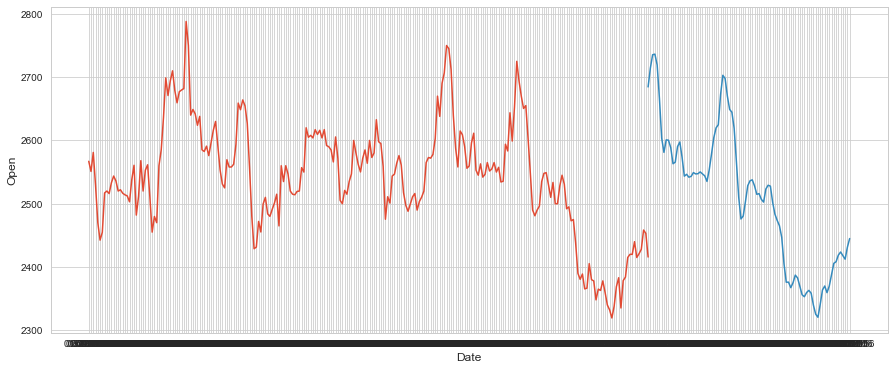

In [39]:
plt.figure(figsize = (15,6))
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forcast['Date'], df_forcast['Open'])

## Tcs Close Price Prediction

In [40]:
# Defining model Architecture
model_tcs_close = Sequential()
model_tcs_close.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(steps,
features)))
model_tcs_close.add(MaxPooling1D(pool_size=2))
model_tcs_close.add(Flatten())
model_tcs_close.add(Dense(100, activation='relu'))
model_tcs_close.add(Dense(1))
model_tcs_close.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model_tcs_close.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 128)            384       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 13,385
Trainable params: 13,385
Non-trainable params: 0
_________________________________________________________________


In [41]:
# fit model# fit model
history_tcs_close = model_tcs_close.fit(X2, y2, epochs=40, validation_data=(X2, y2), batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
7/7 [==============================] - 4s 173ms/step - loss: 5275442.5000 - mse: 5275442.5000 - mae: 2288.9297 - val_loss: 2908149.5000 - val_mse: 2908149.5000 - val_mae: 1704.0922
Epoch 2/40
7/7 [==============================] - 0s 16ms/step - loss: 2422921.5000 - mse: 2422921.5000 - mae: 1547.1985 - val_loss: 1041126.2500 - val_mse: 1041126.2500 - val_mae: 1019.0965
Epoch 3/40
7/7 [==============================] - 0s 15ms/step - loss: 781967.8828 - mse: 781967.9688 - mae: 869.5056 - val_loss: 128140.4062 - val_mse: 128140.4062 - val_mae: 355.1551
Epoch 4/40
7/7 [==============================] - 0s 15ms/step - loss: 65573.0791 - mse: 65573.0791 - mae: 226.5974 - val_loss: 36149.6875 - val_mse: 36149.6875 - val_mae: 183.9782
Epoch 5/40
7/7 [==============================] - 0s 13ms/step - loss: 66180.8467 - mse: 66180.8467 - mae: 246.6308 - val_loss: 119205.7344 - val_mse: 119205.7344 - val_mae: 341.5936
Epoch 6/40
7/7 [==============================] - 0s 14ms/step - los

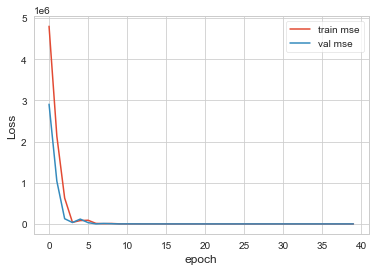

In [42]:
plt.plot(history_tcs_close.history['mse'], label='train mse')
plt.plot(history_tcs_close.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

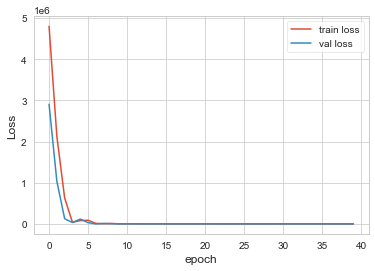

In [43]:
plt.plot(history_tcs_close.history['loss'], label='train loss')
plt.plot(history_tcs_close.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

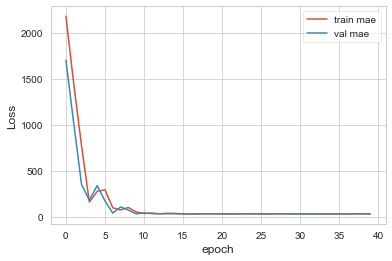

In [44]:
plt.plot(history_tcs_close.history['mae'], label='train mae')
plt.plot(history_tcs_close.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [45]:
tcs_close_pred = model_tcs_close.predict(X2[-n_future:])
print("**************************************************************")
print(tcs_close_pred.shape)
print("**************************************************************")

**************************************************************
(90, 1)
**************************************************************


In [46]:
tcs_close_pred_future = [x.item(0) for x in tcs_close_pred]

In [47]:
df_forcast_tcs_close = pd.DataFrame({'Date': future_dates, 'Close': tcs_close_pred_future})
df_forcast_tcs_close['Date'] = pd.to_datetime(df_forcast_tcs_close['Date'])
df_forcast_tcs_close['Date'] = df_forcast_tcs_close['Date'].dt.strftime('%m/%d/%Y')
df_forcast_tcs_close.head()

,Date,Close
0,12/31/2015,2708.562744
1,01/01/2016,2734.505127
2,01/02/2016,2731.453857
3,01/03/2016,2706.786377
4,01/04/2016,2677.743164


In [48]:
original_tcs_close = tcs_data[['Date', 'Close']]
original_tcs_close['Date'] = pd.to_datetime(original_tcs_close['Date'])
original_tcs_close['Date'] = original_tcs_close['Date'].dt.strftime('%m/%d/%Y')
# original = original.loc[original['Date'] >= '2015-6-01']

<ipython-input-48-84ce52f32155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_tcs_close['Date'] = pd.to_datetime(original_tcs_close['Date'])
<ipython-input-48-84ce52f32155>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_tcs_close['Date'] = original_tcs_close['Date'].dt.strftime('%m/%d/%Y')


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

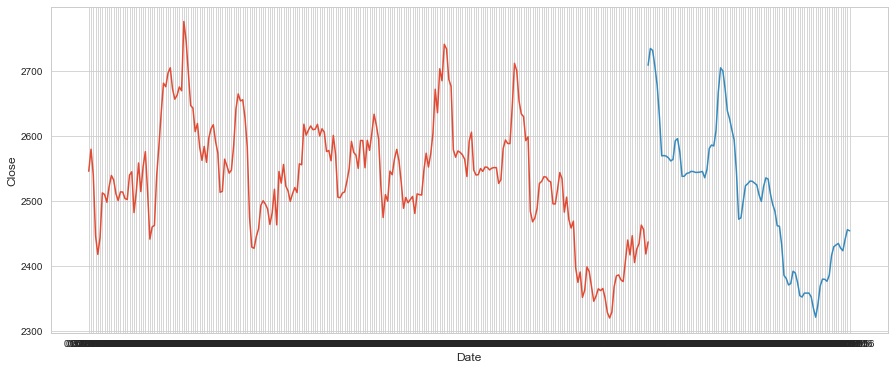

In [49]:
plt.figure(figsize = (15,6))
sns.lineplot(original_tcs_close['Date'], original_tcs_close['Close'])
sns.lineplot(df_forcast_tcs_close['Date'], df_forcast_tcs_close['Close'])

## Inforsys Open Price Prediction

In [50]:
# Infosys Open Price Defining model Architecture
model_info_open = Sequential()
model_info_open.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(steps,
features)))
model_info_open.add(MaxPooling1D(pool_size=2))
model_info_open.add(Flatten())
model_info_open.add(Dense(100, activation='relu'))
model_info_open.add(Dense(1))
model_info_open.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model_info_open.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 2, 128)            384       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 13,385
Trainable params: 13,385
Non-trainable params: 0
_________________________________________________________________


In [51]:
# INfosys Open Price Model fit
history_info_open = model_info_open.fit(X5, y5, epochs=40, validation_data=(X5, y5), batch_size=40, verbose=1)

Epoch 1/40
7/7 [==============================] - 2s 140ms/step - loss: 2050543.2500 - mse: 2050543.2500 - mae: 1345.9601 - val_loss: 867893.3750 - val_mse: 867893.3750 - val_mae: 877.9883
Epoch 2/40
7/7 [==============================] - 0s 14ms/step - loss: 653007.1562 - mse: 653007.1562 - mae: 750.8284 - val_loss: 182431.2969 - val_mse: 182431.2969 - val_mae: 403.0860
Epoch 3/40
7/7 [==============================] - 0s 15ms/step - loss: 115138.0908 - mse: 115138.0908 - mae: 303.4527 - val_loss: 11527.1631 - val_mse: 11527.1631 - val_mae: 35.1975
Epoch 4/40
7/7 [==============================] - 0s 14ms/step - loss: 20796.7403 - mse: 20796.7403 - mae: 85.0320 - val_loss: 63416.3516 - val_mse: 63416.3516 - val_mae: 215.3047
Epoch 5/40
7/7 [==============================] - 0s 14ms/step - loss: 61799.5293 - mse: 61799.5293 - mae: 210.7201 - val_loss: 32051.8320 - val_mse: 32051.8320 - val_mae: 136.5921
Epoch 6/40
7/7 [==============================] - 0s 17ms/step - loss: 30416.5088 -

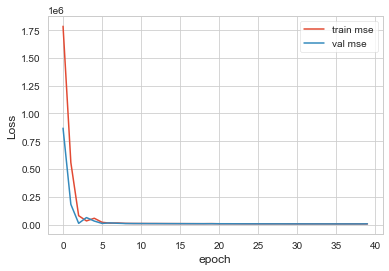

In [52]:
plt.plot(history_info_open.history['mse'], label='train mse')
plt.plot(history_info_open.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

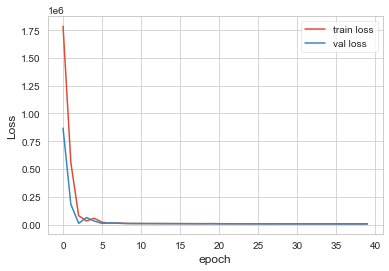

In [53]:
plt.plot(history_info_open.history['loss'], label='train loss')
plt.plot(history_info_open.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

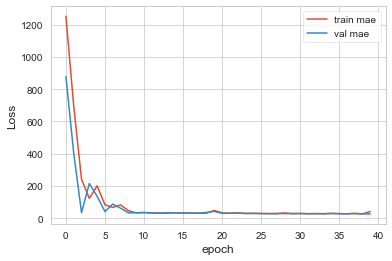

In [54]:
plt.plot(history_info_open.history['mae'], label='train mae')
plt.plot(history_info_open.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [55]:
infosys_open_pred = model_info_open.predict(X5[-n_future:])
print("**************************************************************")
print(infosys_open_pred.shape)
print("**************************************************************")

**************************************************************
(90, 1)
**************************************************************


In [56]:
infosys_open_pred_future = [x.item(0) for x in infosys_open_pred]

In [57]:
infosys_Dates = infosys_data['Date']
infosys_future_dates = pd.date_range(list(infosys_Dates)[-1], periods=n_future, freq='1d')
infosys_forcast_dates = []
for time_i in infosys_future_dates:
    infosys_forcast_dates.append(time_i.date())

In [58]:
df_forcast_info_open = pd.DataFrame({'Date': infosys_future_dates, 'Open': infosys_open_pred_future})
df_forcast_info_open['Date'] = pd.to_datetime(df_forcast_info_open['Date'])
df_forcast_info_open['Date'] = df_forcast_info_open['Date'].dt.strftime('%m/%d/%Y')
df_forcast_info_open.head()

,Date,Open
0,12/31/2015,1124.757324
1,01/01/2016,1135.809326
2,01/02/2016,1136.292236
3,01/03/2016,1129.494141
4,01/04/2016,1108.738403


In [59]:
original_infosys_open = infosys_data[['Date', 'Open']]
original_infosys_open['Date'] = pd.to_datetime(original_infosys_open['Date'])
original_infosys_open['Date'] = original_infosys_open['Date'].dt.strftime('%m/%d/%Y')
# original = original.loc[original['Date'] >= '2015-6-01']

<ipython-input-59-57801cd7f66f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_infosys_open['Date'] = pd.to_datetime(original_infosys_open['Date'])
<ipython-input-59-57801cd7f66f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_infosys_open['Date'] = original_infosys_open['Date'].dt.strftime('%m/%d/%Y')


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

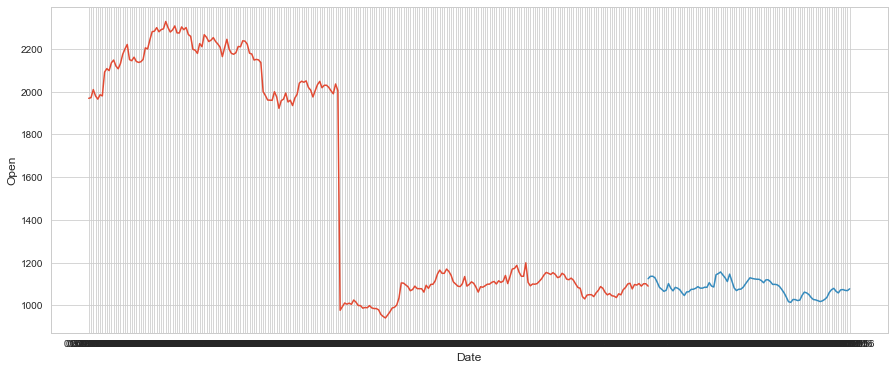

In [60]:
plt.figure(figsize = (15,6))
sns.lineplot(original_infosys_open['Date'], original_infosys_open['Open'])
sns.lineplot(df_forcast_info_open['Date'], df_forcast_info_open['Open'])

## Infosys Close Prediction

In [61]:
# Infosys Close Price Defining model Architecture
model_info_close = Sequential()
model_info_close.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps,
features)))
model_info_close.add(MaxPooling1D(pool_size=2))
model_info_close.add(Flatten())
model_info_close.add(Dense(100, activation='relu'))
model_info_close.add(Dense(1))
model_info_close.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model_info_close.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 6,793
Trainable params: 6,793
Non-trainable params: 0
_________________________________________________________________


In [62]:
history_info_close = model_info_close.fit(X6, y6, epochs=40, validation_data=(X6, y6), batch_size=40, verbose=1)

Epoch 1/40
7/7 [==============================] - 2s 75ms/step - loss: 1225508.3281 - mse: 1225508.3281 - mae: 1042.3715 - val_loss: 488968.9688 - val_mse: 488968.9688 - val_mae: 658.9347
Epoch 2/40
7/7 [==============================] - 0s 9ms/step - loss: 352481.3711 - mse: 352481.3711 - mae: 547.5651 - val_loss: 42660.1328 - val_mse: 42660.1328 - val_mae: 187.1989
Epoch 3/40
7/7 [==============================] - 0s 10ms/step - loss: 27457.7034 - mse: 27457.7034 - mae: 121.8917 - val_loss: 39372.5352 - val_mse: 39372.5352 - val_mae: 160.8868
Epoch 4/40
7/7 [==============================] - 0s 11ms/step - loss: 63320.6929 - mse: 63320.6929 - mae: 198.9993 - val_loss: 63833.7383 - val_mse: 63833.7383 - val_mae: 218.4425
Epoch 5/40
7/7 [==============================] - 0s 10ms/step - loss: 54548.3208 - mse: 54548.3208 - mae: 194.1037 - val_loss: 19046.1328 - val_mse: 19046.1328 - val_mae: 89.9557
Epoch 6/40
7/7 [==============================] - 0s 9ms/step - loss: 27491.7599 - mse: 

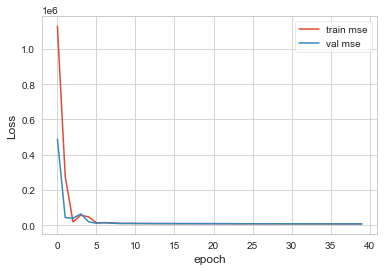

In [63]:
plt.plot(history_info_close.history['mse'], label='train mse')
plt.plot(history_info_close.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

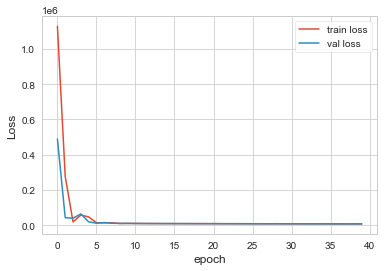

In [64]:
plt.plot(history_info_close.history['loss'], label='train loss')
plt.plot(history_info_close.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

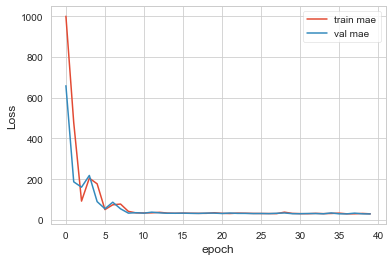

In [65]:
plt.plot(history_info_close.history['mae'], label='train mae')
plt.plot(history_info_close.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [66]:
infosys_close_pred = model_info_close.predict(X6[-n_future:])
print("**************************************************************")
print(infosys_close_pred.shape)
print("**************************************************************")
infosys_close_pred_future = [x.item(0) for x in infosys_close_pred]

**************************************************************
(90, 1)
**************************************************************


In [67]:
df_forcast_info_close = pd.DataFrame({'Date': infosys_future_dates, 'Close': infosys_close_pred_future})
df_forcast_info_close['Date'] = pd.to_datetime(df_forcast_info_close['Date'])
df_forcast_info_close['Date'] = df_forcast_info_close['Date'].dt.strftime('%d/%m/%Y')
df_forcast_info_close.head()

,Date,Close
0,31/12/2015,1149.651123
1,01/01/2016,1168.567383
2,02/01/2016,1156.045654
3,03/01/2016,1139.754395
4,04/01/2016,1124.898682


In [68]:
original_infosys_close = infosys_data[['Date', 'Close']]
original_infosys_close['Date'] = pd.to_datetime(original_infosys_close['Date'])
original_infosys_close['Date'] = original_infosys_close['Date'].dt.strftime('%d/%m/%Y')
# original = original.loc[original['Date'] >= '2015-6-01']

<ipython-input-68-c53b3c13997d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_infosys_close['Date'] = pd.to_datetime(original_infosys_close['Date'])
<ipython-input-68-c53b3c13997d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_infosys_close['Date'] = original_infosys_close['Date'].dt.strftime('%d/%m/%Y')


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

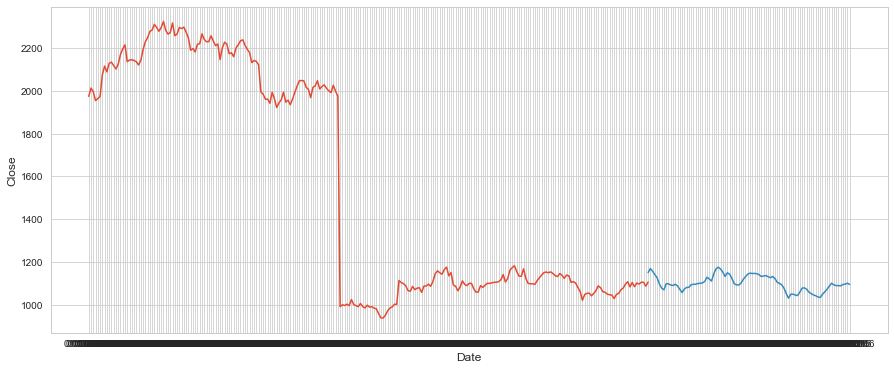

In [69]:
plt.figure(figsize = (15,6))
sns.lineplot(original_infosys_close['Date'], original_infosys_close['Close'])
sns.lineplot(df_forcast_info_close['Date'], df_forcast_info_close['Close'])

C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

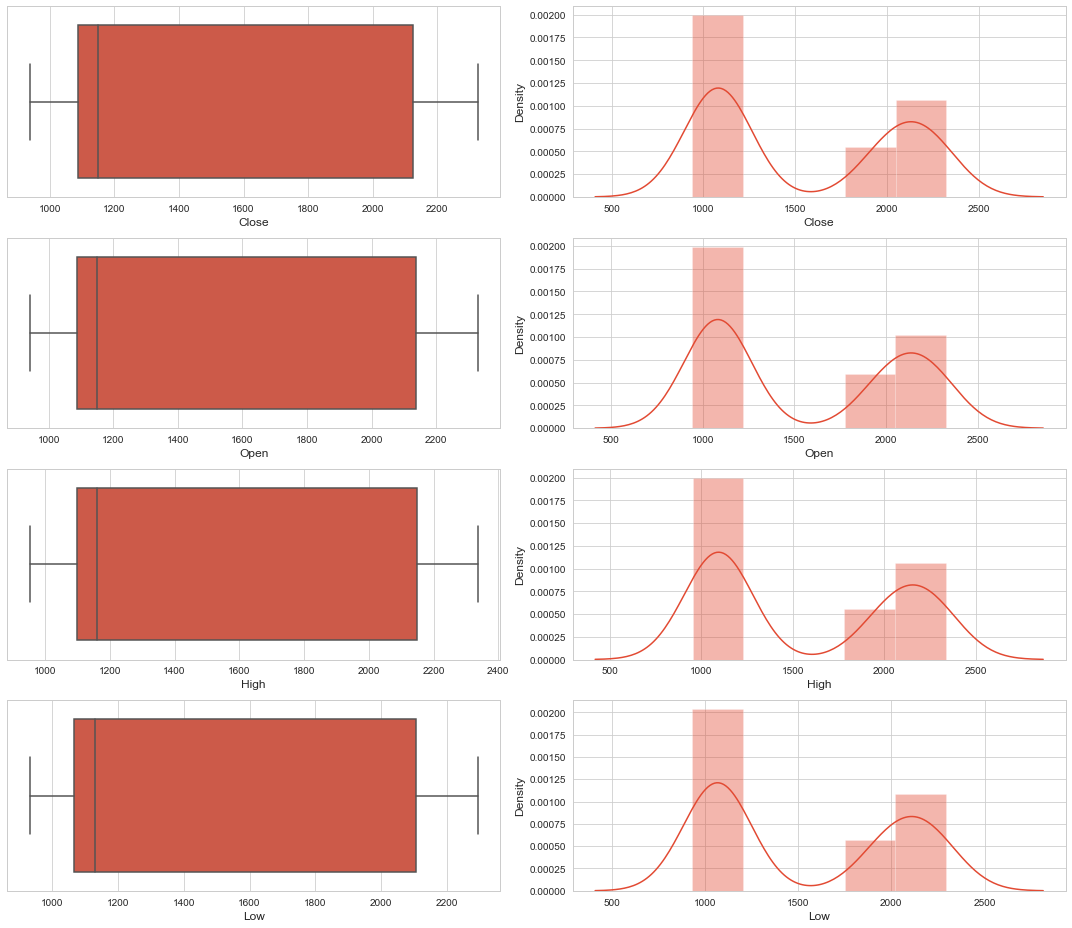

In [70]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= infosys_data["Close"], ax = ax[0,0])
sns.distplot(infosys_data['Close'], ax = ax[0,1])
sns.boxplot(x= infosys_data["Open"], ax = ax[1,0])
sns.distplot(infosys_data['Open'], ax = ax[1,1])
sns.boxplot(x= infosys_data["High"], ax = ax[2,0])
sns.distplot(infosys_data['High'], ax = ax[2,1])
sns.boxplot(x= infosys_data["Low"], ax = ax[3,0])
sns.distplot(infosys_data['Low'], ax = ax[3,1])
plt.tight_layout()

## Nifty it Index  Open Prediction

In [71]:
# Nifty index Open Price Defining model Architecture
model_nifty_open = Sequential()
model_nifty_open.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps,
features)))
model_nifty_open.add(MaxPooling1D(pool_size=2))
model_nifty_open.add(Flatten())
model_nifty_open.add(Dense(100, activation='relu'))
model_nifty_open.add(Dense(1))
model_nifty_open.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model_nifty_open.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 6,793
Trainable params: 6,793
Non-trainable params: 0
_________________________________________________________________


In [72]:
history_nifty_open = model_nifty_open.fit(X9, y9, epochs=40, validation_data=(X9, y9), batch_size=10, verbose=1)

Epoch 1/40
25/25 [==============================] - 2s 24ms/step - loss: 112170137.2308 - mse: 112170137.2308 - mae: 10329.1492 - val_loss: 8836338.0000 - val_mse: 8836338.0000 - val_mae: 2966.5818
Epoch 2/40
25/25 [==============================] - 0s 6ms/step - loss: 3474561.1154 - mse: 3474561.1154 - mae: 1592.9810 - val_loss: 1087923.5000 - val_mse: 1087923.5000 - val_mae: 1028.2174
Epoch 3/40
25/25 [==============================] - 0s 6ms/step - loss: 463137.2554 - mse: 463137.2812 - mae: 576.2881 - val_loss: 114317.4844 - val_mse: 114317.4844 - val_mae: 306.3633
Epoch 4/40
25/25 [==============================] - 0s 7ms/step - loss: 57889.6546 - mse: 57889.6546 - mae: 197.4742 - val_loss: 34416.1562 - val_mse: 34416.1562 - val_mae: 139.3000
Epoch 5/40
25/25 [==============================] - 0s 7ms/step - loss: 34254.6345 - mse: 34254.6345 - mae: 140.3233 - val_loss: 27256.5527 - val_mse: 27256.5527 - val_mae: 129.9208
Epoch 6/40
25/25 [==============================] - 0s 7ms/s

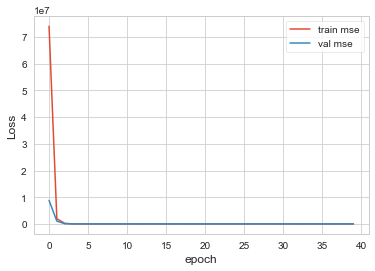

In [73]:
plt.plot(history_nifty_open.history['mse'], label='train mse')
plt.plot(history_nifty_open.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

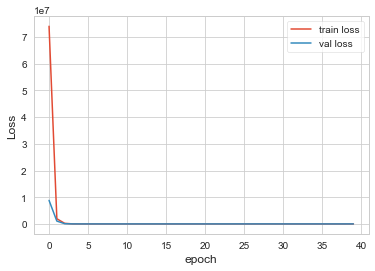

In [74]:
plt.plot(history_nifty_open.history['loss'], label='train loss')
plt.plot(history_nifty_open.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

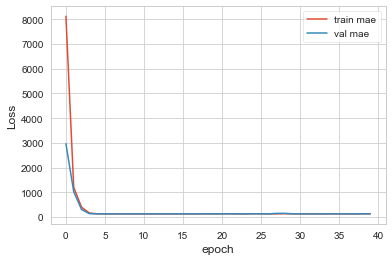

In [75]:
plt.plot(history_nifty_open.history['mae'], label='train mae')
plt.plot(history_nifty_open.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [76]:
nifty_open_pred = model_nifty_open.predict(X9[-n_future:])
print("**************************************************************")
print(nifty_open_pred.shape)
print("**************************************************************")
nifty_open_pred_future = [x.item(0) for x in nifty_open_pred]

**************************************************************
(90, 1)
**************************************************************


In [77]:
nifty_Dates = nifty_it_data['Date']
nifty_future_dates = pd.date_range(list(nifty_Dates)[-1], periods=n_future, freq='1d')
nifty_forcast_dates = []
for time_i in nifty_future_dates:
    nifty_forcast_dates.append(time_i.date())

In [78]:
df_forcast_nifty_open = pd.DataFrame({'Date': nifty_future_dates, 'Open': nifty_open_pred_future})
df_forcast_nifty_open['Date'] = pd.to_datetime(df_forcast_nifty_open['Date'])
df_forcast_nifty_open['Date'] = df_forcast_nifty_open['Date'].dt.strftime('%d/%m/%Y')
df_forcast_nifty_open.head()

,Date,Open
0,31/12/2015,12079.224609
1,01/01/2016,12158.910156
2,02/01/2016,12257.627930
3,03/01/2016,12271.406250
4,04/01/2016,12146.759766


In [79]:
original_nifty_open = nifty_it_data[['Date', 'Open']]
original_nifty_open['Date'] = pd.to_datetime(original_nifty_open['Date'])
original_nifty_open['Date'] = original_nifty_open['Date'].dt.strftime('%d/%m/%Y')
# original = original.loc[original['Date'] >= '2015-6-01']

<ipython-input-79-e935ce67db73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_nifty_open['Date'] = pd.to_datetime(original_nifty_open['Date'])
<ipython-input-79-e935ce67db73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_nifty_open['Date'] = original_nifty_open['Date'].dt.strftime('%d/%m/%Y')


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

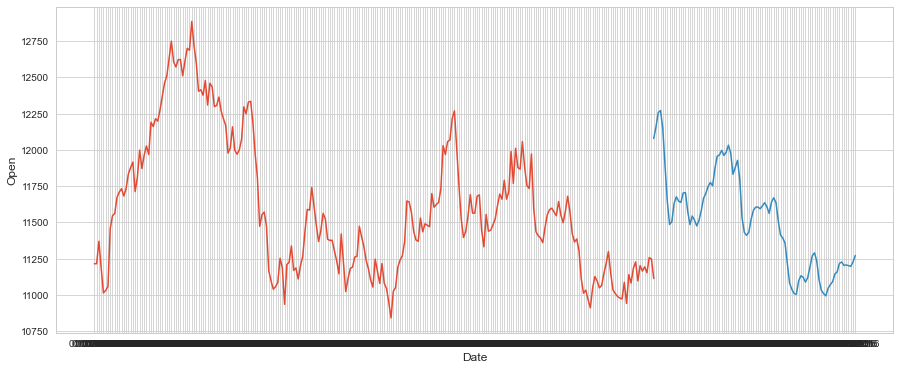

In [80]:
plt.figure(figsize = (15,6))
sns.lineplot(original_nifty_open['Date'], original_nifty_open['Open'])
sns.lineplot(df_forcast_nifty_open['Date'], df_forcast_nifty_open['Open'])

## Nifty Index close price prediction

In [81]:
# Nifty index Open Price Defining model Architecture
model_nifty_close = Sequential()
model_nifty_close.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps,
features)))
model_nifty_close.add(MaxPooling1D(pool_size=2))
model_nifty_close.add(Flatten())
model_nifty_close.add(Dense(100, activation='relu'))
model_nifty_close.add(Dense(1))
model_nifty_close.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model_nifty_close.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               6500      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 6,793
Trainable params: 6,793
Non-trainable params: 0
_________________________________________________________________


In [82]:
history_nifty_close = model_nifty_close.fit(X10, y10, epochs=40, validation_data=(X10, y10), batch_size=10, verbose=1)

Epoch 1/40
25/25 [==============================] - 2s 32ms/step - loss: 62338496.7692 - mse: 62338496.7692 - mae: 7516.5313 - val_loss: 39537.5938 - val_mse: 39537.5938 - val_mae: 164.7108
Epoch 2/40
25/25 [==============================] - 0s 5ms/step - loss: 829999.6418 - mse: 829999.6418 - mae: 775.9005 - val_loss: 35575.7852 - val_mse: 35575.7852 - val_mae: 140.9993
Epoch 3/40
25/25 [==============================] - 0s 5ms/step - loss: 84998.0129 - mse: 84998.0129 - mae: 240.9951 - val_loss: 28631.9238 - val_mse: 28631.9238 - val_mae: 132.9724
Epoch 4/40
25/25 [==============================] - 0s 5ms/step - loss: 33202.3002 - mse: 33202.3002 - mae: 139.2840 - val_loss: 28837.5547 - val_mse: 28837.5547 - val_mae: 133.9718
Epoch 5/40
25/25 [==============================] - 0s 6ms/step - loss: 30178.8515 - mse: 30178.8515 - mae: 134.7000 - val_loss: 28977.5918 - val_mse: 28977.5918 - val_mae: 130.4829
Epoch 6/40
25/25 [==============================] - 0s 6ms/step - loss: 29662.45

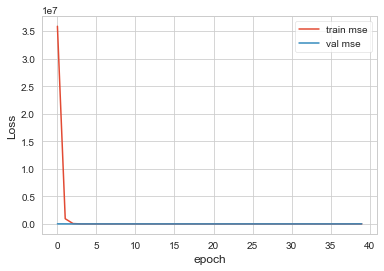

In [83]:
plt.plot(history_nifty_close.history['mse'], label='train mse')
plt.plot(history_nifty_close.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

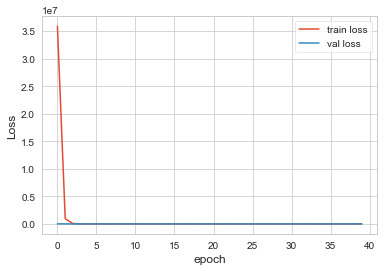

In [84]:
plt.plot(history_nifty_close.history['loss'], label='train loss')
plt.plot(history_nifty_close.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

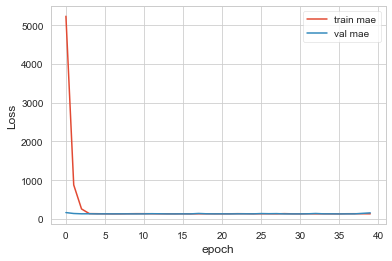

In [85]:
plt.plot(history_nifty_close.history['mae'], label='train mae')
plt.plot(history_nifty_close.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [86]:
nifty_close_pred = model_nifty_close.predict(X10[-n_future:])
print("**************************************************************")
print(nifty_close_pred.shape)
print("**************************************************************")
nifty_close_pred_future = [x.item(0) for x in nifty_close_pred]

**************************************************************
(90, 1)
**************************************************************


In [87]:
df_forcast_nifty_close = pd.DataFrame({'Date': nifty_future_dates, 'Close': nifty_close_pred_future})
df_forcast_nifty_close['Date'] = pd.to_datetime(df_forcast_nifty_close['Date'])
df_forcast_nifty_close['Date'] = df_forcast_nifty_close['Date'].dt.strftime('%d/%m/%Y')
df_forcast_nifty_close.head()

,Date,Close
0,31/12/2015,11952.267578
1,01/01/2016,12062.271484
2,02/01/2016,12086.257812
3,03/01/2016,11991.821289
4,04/01/2016,11891.223633


In [88]:
original_nifty_close = nifty_it_data[['Date', 'Close']]
original_nifty_close['Date'] = pd.to_datetime(original_nifty_close['Date'])
original_nifty_close['Date'] = original_nifty_close['Date'].dt.strftime('%d/%m/%Y')
# original = original.loc[original['Date'] >= '2015-6-01']

<ipython-input-88-a69f1f931a1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_nifty_close['Date'] = pd.to_datetime(original_nifty_close['Date'])
<ipython-input-88-a69f1f931a1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_nifty_close['Date'] = original_nifty_close['Date'].dt.strftime('%d/%m/%Y')


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

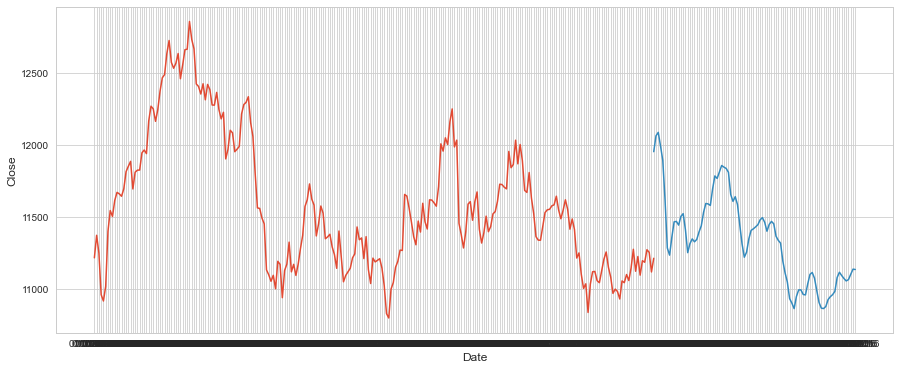

In [89]:
plt.figure(figsize = (15,6))
sns.lineplot(original_nifty_close['Date'], original_nifty_close['Close'])
sns.lineplot(df_forcast_nifty_close['Date'], df_forcast_nifty_close['Close'])

In [90]:
df_forcast_nifty_close.head()

,Date,Close
0,31/12/2015,11952.267578
1,01/01/2016,12062.271484
2,02/01/2016,12086.257812
3,03/01/2016,11991.821289
4,04/01/2016,11891.223633


In [91]:
nifty_it_data.tail()

,Date,Open,High,Low,Close,Volume,Turnover,Daily Return Open,Daily Return Close,Daily Return High,Daily Return Low
243,24/12/2015,11193.25,11197.50,11152.85,11184.90,2927864,3182700000,0.002638,-0.000960,-0.000794,0.001994
244,28/12/2015,11152.70,11303.05,11146.85,11271.80,8055590,10019000000,-0.003623,0.007769,0.009426,-0.000538
245,29/12/2015,11257.05,11287.50,11206.60,11253.45,6024174,6626200000,0.009356,-0.001628,-0.001376,0.005360
246,30/12/2015,11247.35,11263.60,11100.10,11117.60,6564991,7071900000,-0.000862,-0.012072,-0.002117,-0.009503
247,31/12/2015,11113.00,11233.85,11113.00,11212.55,8197040,8590500000,-0.011945,0.008541,-0.002641,0.001162


# Forecasting Using RNN - LSTM 

### appllied for nifty index close price 

In [92]:
lstm_nifty_close_df = original_nifty_close
lstm_nifty_close_df['Date'] = pd.to_datetime(lstm_nifty_close_df['Date'])

<ipython-input-92-51c2400234a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_nifty_close_df['Date'] = pd.to_datetime(lstm_nifty_close_df['Date'])


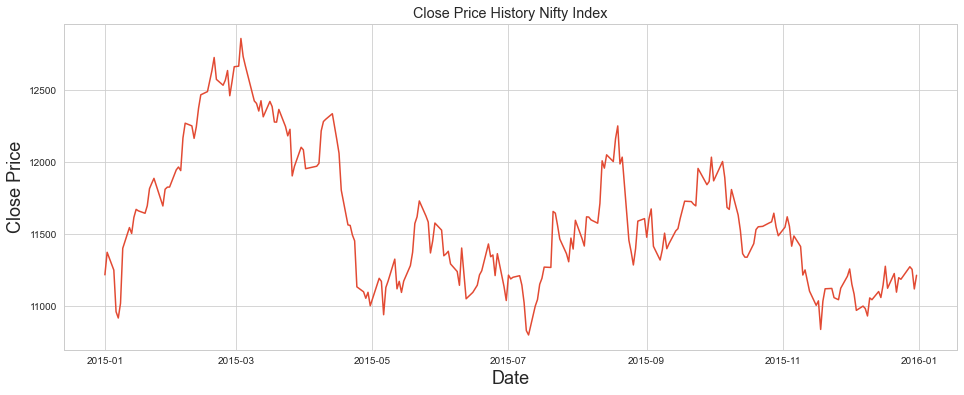

In [93]:
plt.figure(figsize=(16,6))
plt.title('Close Price History Nifty Index')
plt.plot(original_nifty_close['Date'], original_nifty_close['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [139]:
# Create a new dataframe with only the 'Close column 
nifty_close_df = lstm_nifty_close_df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = nifty_close_df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
print(len(dataset))
training_data_len

248


236

In [137]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

len(scaled_data)

248

In [122]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(steps, len(train_data)):
    x_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])
    if i<= steps+1:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.20287707, 0.27888611, 0.21884188])]
[0.07856049376716179]

[array([0.20287707, 0.27888611, 0.21884188]), array([0.27888611, 0.21884188, 0.07856049])]
[0.07856049376716179, 0.05722547566398628]



(233, 3, 1)

In [123]:
from keras.layers import Dense, LSTM

In [124]:
# Build the LSTM model
model_lstm_nifty_close = Sequential()
model_lstm_nifty_close.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm_nifty_close.add(LSTM(64, return_sequences=False))
model_lstm_nifty_close.add(Dense(25))
model_lstm_nifty_close.add(Dense(1))

# Compile the model
model_lstm_nifty_close.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm_nifty_close = model_lstm_nifty_close.fit(x_train, y_train, batch_size=40, epochs=40)

Epoch 1/40
6/6 [==============================] - 4s 6ms/step - loss: 0.1962
Epoch 2/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0697
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0254
Epoch 4/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0322
Epoch 5/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0173
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0195
Epoch 7/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0123
Epoch 8/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 9/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0079
Epoch 10/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0079
Epoch 11/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0071
Epoch 12/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 13/40
6/6 [==============================] - 0s 6ms/step - loss: 0.

In [ ]:
history_lstm_nifty_close.history
plt.plot(history_lstm_nifty_close.history['loss'], label='Loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [136]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - steps: , :]
# Create the data sets x_test and y_test
x_test = []
print(training_data_len)
print(len(test_data))
y_test = dataset[training_data_len:, :]
print(len(test_data))
for i in range(steps, len(test_data)):
    x_test.append(test_data[i-steps:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
print(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print(x_test.shape)
# Get the models predicted price values 
predictions = model_lstm_nifty_close.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

236
15
15
[[0.12502126 0.11897067 0.14650208]
 [0.11897067 0.14650208 0.12635774]
 [0.14650208 0.12635774 0.16846888]
 [0.12635774 0.16846888 0.23176925]
 [0.16846888 0.23176925 0.15758268]
 [0.23176925 0.15758268 0.20727529]
 [0.15758268 0.20727529 0.14443661]
 [0.20727529 0.14443661 0.19313294]
 [0.14443661 0.19313294 0.18790854]
 [0.19313294 0.18790854 0.23014118]
 [0.18790854 0.23014118 0.22122324]
 [0.23014118 0.22122324 0.15520132]]
(12, 3, 1)


77.1062967025746

In [121]:
predictions

array([[11007.852],
       [11034.141],
       [11075.435],
       [11147.092],
       [11192.241],
       [11236.184],
       [11243.598],
       [11250.487],
       [11253.894],
       [11274.46 ],
       [11298.136],
       [11289.583]], dtype=float32)

In [101]:
nifty_index_predictions = [x.item(0) for x in predictions]

In [102]:
nifty_Dates = nifty_it_data['Date']
nifty_future_dates_new = pd.date_range(list(nifty_Dates)[-1], periods=12, freq='1d')
nifty_forcast_dates_new = []
for time_i in nifty_future_dates_new:
    nifty_forcast_dates_new.append(time_i.date())

In [103]:
df_forcast_nifty_close_lstm = pd.DataFrame({'Date': nifty_forcast_dates_new, 'Close': nifty_index_predictions})
df_forcast_nifty_close_lstm['Date'] = pd.to_datetime(df_forcast_nifty_close_lstm['Date'])
df_forcast_nifty_close_lstm['Date'] = df_forcast_nifty_close_lstm['Date'].dt.strftime('%d/%m/%Y')
df_forcast_nifty_close_lstm.head()

,Date,Close
0,31/12/2015,11106.727539
1,01/01/2016,11091.397461
2,02/01/2016,11136.283203
3,03/01/2016,11243.400391
4,04/01/2016,11176.778320


In [104]:
lstm_nifty_close_df['Date'] = lstm_nifty_close_df['Date'].dt.strftime('%d/%m/%Y')

<ipython-input-104-76b20b0c8610>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_nifty_close_df['Date'] = lstm_nifty_close_df['Date'].dt.strftime('%d/%m/%Y')


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

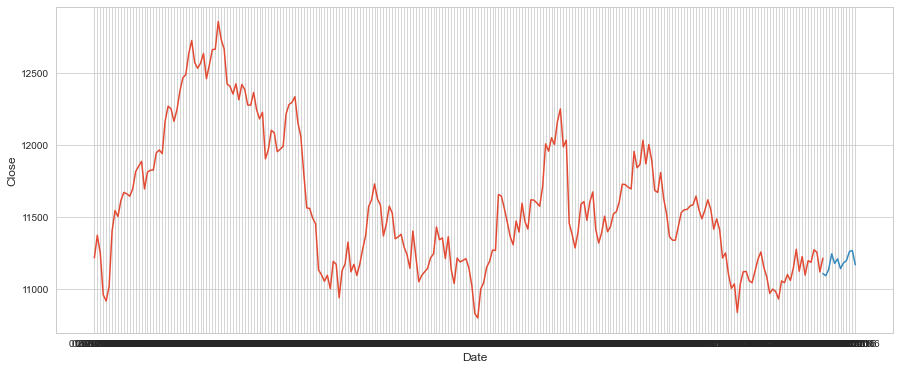

In [105]:
plt.figure(figsize = (15,6))
sns.lineplot(lstm_nifty_close_df['Date'], lstm_nifty_close_df['Close'])
sns.lineplot(df_forcast_nifty_close_lstm['Date'], df_forcast_nifty_close_lstm['Close'])

In [106]:
x_test.shape

(12, 60, 1)

## LSTM with Nifty Open Price

In [140]:
lstm_nifty_open_df = original_nifty_open
lstm_nifty_open_df['Date'] = pd.to_datetime(lstm_nifty_open_df['Date'])

<ipython-input-140-8e74f32b19eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_nifty_open_df['Date'] = pd.to_datetime(lstm_nifty_open_df['Date'])


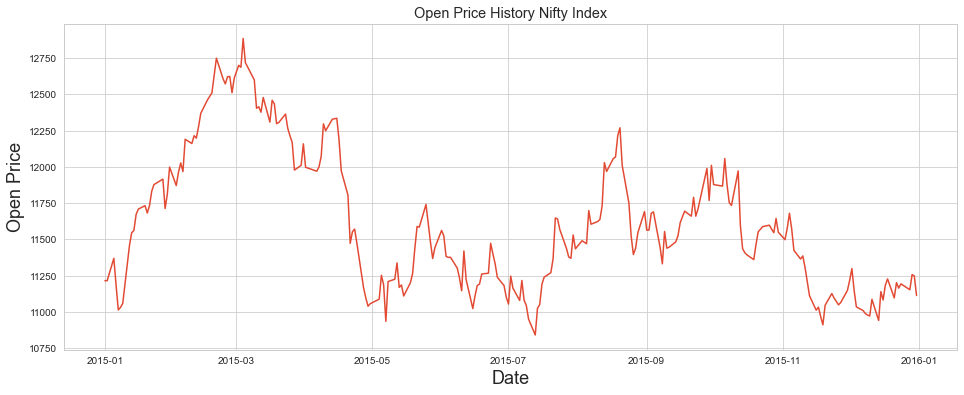

In [142]:
plt.figure(figsize=(16,6))
plt.title('Open Price History Nifty Index')
plt.plot(original_nifty_open['Date'], original_nifty_open['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price', fontsize=18)
plt.show()

In [143]:
# Create a new dataframe with only the 'Close column 
nifty_open_df = lstm_nifty_open_df.filter(['Open'])
# Convert the dataframe to a numpy array
dataset = nifty_open_df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
print(len(dataset))
training_data_len

248


236

In [144]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

len(scaled_data)

248

In [145]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(steps, len(train_data)):
    x_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])
    if i<= steps+1:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.18294949, 0.18287614, 0.25852037])]
[0.168915945430542]

[array([0.18294949, 0.18287614, 0.25852037]), array([0.18287614, 0.25852037, 0.16891595])]
[0.168915945430542, 0.08437240232751542]



(233, 3, 1)

### added 3 lstm layers with different units like 128, 64, 32

In [146]:
# Build the LSTM model
model_lstm_nifty_open = Sequential()
model_lstm_nifty_open.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm_nifty_open.add(LSTM(64, return_sequences=True))
model_lstm_nifty_open.add(LSTM(32, return_sequences=False))
model_lstm_nifty_open.add(Dense(25))
model_lstm_nifty_open.add(Dense(1))

# Compile the model
model_lstm_nifty_open.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm_nifty_open = model_lstm_nifty_open.fit(x_train, y_train, batch_size=40, epochs=40)

Epoch 1/40
6/6 [==============================] - 12s 53ms/step - loss: 0.1693
Epoch 2/40
6/6 [==============================] - 0s 85ms/step - loss: 0.0784
Epoch 3/40
6/6 [==============================] - 0s 79ms/step - loss: 0.0332
Epoch 4/40
6/6 [==============================] - 0s 18ms/step - loss: 0.0372
Epoch 5/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0252
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0237
Epoch 7/40
6/6 [==============================] - 0s 5ms/step - loss: 0.0156
Epoch 8/40
6/6 [==============================] - 0s 5ms/step - loss: 0.0126
Epoch 9/40
6/6 [==============================] - 0s 17ms/step - loss: 0.0083
Epoch 10/40
6/6 [==============================] - 0s 16ms/step - loss: 0.0087
Epoch 11/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 12/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0077
Epoch 13/40
6/6 [==============================] - 0s 6ms/step - l

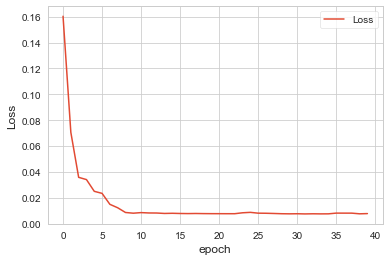

In [147]:
plt.plot(history_lstm_nifty_open.history['loss'], label='Loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [149]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - steps: , :]
# Create the data sets x_test and y_test
x_test = []
print(training_data_len)
print(len(test_data))
y_test = dataset[training_data_len:, :]
print(len(test_data))
for i in range(steps, len(test_data)):
    x_test.append(test_data[i-steps:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
print(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print(x_test.shape)
# Get the models predicted price values 
predictions = model_lstm_nifty_open.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

236
15
15
[[0.06400665 0.12023862 0.04894626]
 [0.12023862 0.04894626 0.14615422]
 [0.04894626 0.14615422 0.11789155]
 [0.14615422 0.11789155 0.16737568]
 [0.11789155 0.16737568 0.18898831]
 [0.16737568 0.18898831 0.12505501]
 [0.18898831 0.12505501 0.17659283]
 [0.12505501 0.17659283 0.15801183]
 [0.17659283 0.15801183 0.17241211]
 [0.15801183 0.17241211 0.15258423]
 [0.17241211 0.15258423 0.20360863]
 [0.15258423 0.20360863 0.19886558]]
(12, 3, 1)


62.29756087446802

In [150]:
predictions

array([[11069.645],
       [11099.993],
       [11085.413],
       [11163.269],
       [11170.668],
       [11210.623],
       [11205.956],
       [11174.867],
       [11212.331],
       [11199.69 ],
       [11212.811],
       [11222.592]], dtype=float32)

In [151]:
nifty_index_open_predictions = [x.item(0) for x in predictions]

In [152]:
df_forcast_nifty_open_lstm = pd.DataFrame({'Date': nifty_forcast_dates_new, 'Open': nifty_index_open_predictions})
df_forcast_nifty_open_lstm['Date'] = pd.to_datetime(df_forcast_nifty_open_lstm['Date'])
df_forcast_nifty_open_lstm['Date'] = df_forcast_nifty_open_lstm['Date'].dt.strftime('%d/%m/%Y')
df_forcast_nifty_open_lstm.head()

,Date,Open
0,31/12/2015,11069.644531
1,01/01/2016,11099.993164
2,02/01/2016,11085.413086
3,03/01/2016,11163.268555
4,04/01/2016,11170.667969


In [155]:
lstm_nifty_open_df['Date'] = lstm_nifty_open_df['Date'].dt.strftime('%d/%m/%Y')

<ipython-input-155-d4b0ddd2566c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_nifty_open_df['Date'] = lstm_nifty_open_df['Date'].dt.strftime('%d/%m/%Y')


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

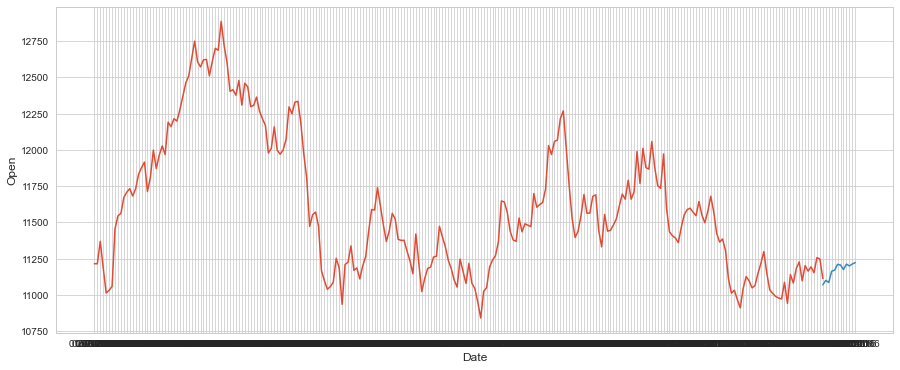

In [156]:
plt.figure(figsize = (15,6))
sns.lineplot(lstm_nifty_open_df['Date'], lstm_nifty_open_df['Open'])
sns.lineplot(df_forcast_nifty_open_lstm['Date'], df_forcast_nifty_open_lstm['Open'])

## LSTM model with TCS data with Open Price 

In [166]:
lstm_tcs_open_df = original
lstm_tcs_open_df['Date'] = pd.to_datetime(lstm_tcs_open_df['Date'])

<ipython-input-166-f7f3ea812e0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_tcs_open_df['Date'] = pd.to_datetime(lstm_tcs_open_df['Date'])


In [167]:
lstm_tcs_open_df['Date'] = lstm_tcs_open_df['Date'].dt.strftime('%d/%m/%Y')

<ipython-input-167-e99d169dee7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_tcs_open_df['Date'] = lstm_tcs_open_df['Date'].dt.strftime('%d/%m/%Y')


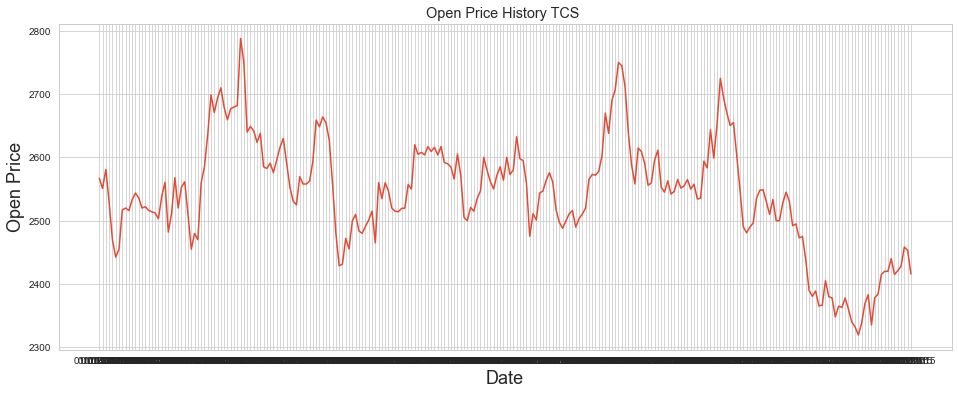

In [168]:
plt.figure(figsize=(16,6))
plt.title('Open Price History TCS ')
plt.plot(lstm_tcs_open_df['Date'], lstm_tcs_open_df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price', fontsize=18)
plt.show()

In [169]:
original

,Date,Open
0,01/01/2015,2567.00
1,01/02/2015,2551.00
2,01/05/2015,2581.00
3,01/06/2015,2529.10
4,01/07/2015,2470.00
...,...,...
243,24/12/2015,2421.00
244,28/12/2015,2428.00
245,29/12/2015,2458.35
246,30/12/2015,2453.05


In [170]:
# Create a new dataframe with only the 'TCS DATA Open column 
tcs_open_df = lstm_tcs_open_df.filter(['Open'])
# Convert the dataframe to a numpy array
dataset = tcs_open_df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
print(len(dataset))
training_data_len

248


236

In [171]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

len(scaled_data)

248

In [172]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(steps, len(train_data)):
    x_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])
    if i<= steps+1:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.52838242, 0.49423816, 0.55825864])]
[0.44750320102432806]

[array([0.52838242, 0.49423816, 0.55825864]), array([0.49423816, 0.55825864, 0.4475032 ])]
[0.44750320102432806, 0.32138284250960325]



(233, 3, 1)

In [173]:
# Build the LSTM model
model_lstm_tcs_open = Sequential()
model_lstm_tcs_open.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm_tcs_open.add(LSTM(64, return_sequences=True))
model_lstm_tcs_open.add(LSTM(32, return_sequences=False))
model_lstm_tcs_open.add(Dense(25))
model_lstm_tcs_open.add(Dense(1))

# Compile the model
model_lstm_tcs_open.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm_tcs_open = model_lstm_tcs_open.fit(x_train, y_train, batch_size=40, epochs=40)

Epoch 1/40
6/6 [==============================] - 9s 7ms/step - loss: 0.2479
Epoch 2/40
6/6 [==============================] - 0s 7ms/step - loss: 0.1177
Epoch 3/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0295
Epoch 4/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0396
Epoch 5/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0200
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0261
Epoch 7/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0202
Epoch 8/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0192
Epoch 9/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0159
Epoch 10/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0162
Epoch 11/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0142
Epoch 12/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0152
Epoch 13/40
6/6 [==============================] - 0s 7ms/step - loss: 0.

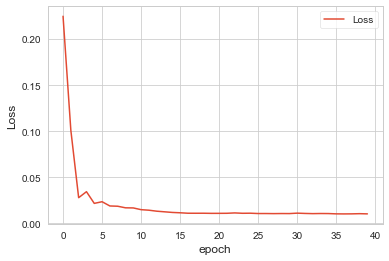

In [174]:
plt.plot(history_lstm_tcs_open.history['loss'], label='Loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [176]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - steps: , :]
# Create the data sets x_test and y_test
x_test = []
print(training_data_len)
print(len(test_data))
y_test = dataset[training_data_len:, :]
print(len(test_data))
for i in range(steps, len(test_data)):
    x_test.append(test_data[i-steps:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
print(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print(x_test.shape)
# Get the models predicted price values 
predictions = model_lstm_tcs_open.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

236
15
15
[[0.1058472  0.13572343 0.03371746]
 [0.13572343 0.03371746 0.12601366]
 [0.03371746 0.12601366 0.13785745]
 [0.12601366 0.13785745 0.20401195]
 [0.13785745 0.20401195 0.21468203]
 [0.20401195 0.21468203 0.21457533]
 [0.21468203 0.21457533 0.25736236]
 [0.21457533 0.25736236 0.20401195]
 [0.25736236 0.20401195 0.21681605]
 [0.20401195 0.21681605 0.23175416]
 [0.21681605 0.23175416 0.29652155]
 [0.23175416 0.29652155 0.28521127]]
(12, 3, 1)


19.60132880865098

In [178]:
tcs_open_predictions = [x.item(0) for x in predictions]

In [179]:
tcs_Dates = tcs_data['Date']
tcs_future_dates_new = pd.date_range(list(tcs_Dates)[-1], periods=12, freq='1d')
tcs_forcast_dates_new = []
for time_i in tcs_future_dates_new:
    tcs_forcast_dates_new.append(time_i.date())

In [195]:
df_forcast_tcs_open_lstm = pd.DataFrame({'Date':tcs_forcast_dates_new, 'Open': tcs_open_predictions})
df_forcast_tcs_open_lstm['Date'] = pd.to_datetime(df_forcast_tcs_open_lstm['Date'])
df_forcast_tcs_open_lstm['Date'] = df_forcast_tcs_open_lstm['Date'].dt.strftime('%d/%m/%Y')
df_forcast_tcs_open_lstm.head()

,Date,Open
0,31/12/2015,2392.197754
1,01/01/2016,2390.073242
2,02/01/2016,2381.755615
3,03/01/2016,2405.058350
4,04/01/2016,2416.344971


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

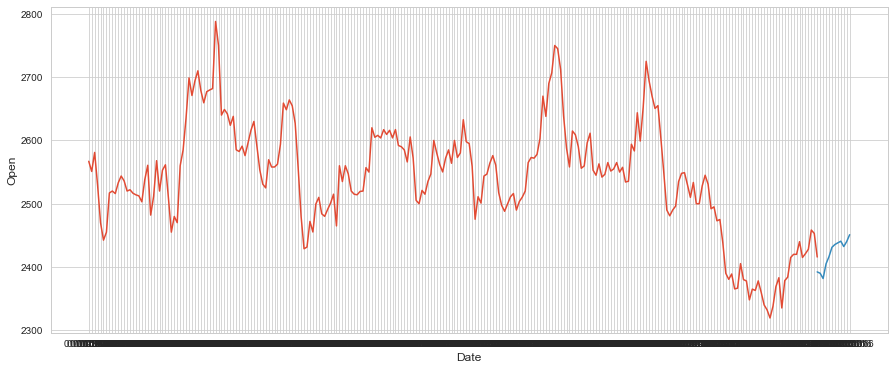

In [181]:
plt.figure(figsize = (15,6))
sns.lineplot(lstm_tcs_open_df['Date'], lstm_tcs_open_df['Open'])
sns.lineplot(df_forcast_tcs_open_lstm['Date'], df_forcast_tcs_open_lstm['Open'])

In [182]:
lstm_tcs_close_df = original_tcs_close
lstm_tcs_close_df['Date'] = pd.to_datetime(lstm_tcs_close_df['Date'])

<ipython-input-182-21e001238663>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_tcs_close_df['Date'] = pd.to_datetime(lstm_tcs_close_df['Date'])


In [183]:
lstm_tcs_close_df['Date'] = lstm_tcs_close_df['Date'].dt.strftime('%d/%m/%Y')

<ipython-input-183-995a9caa6010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_tcs_close_df['Date'] = lstm_tcs_close_df['Date'].dt.strftime('%d/%m/%Y')


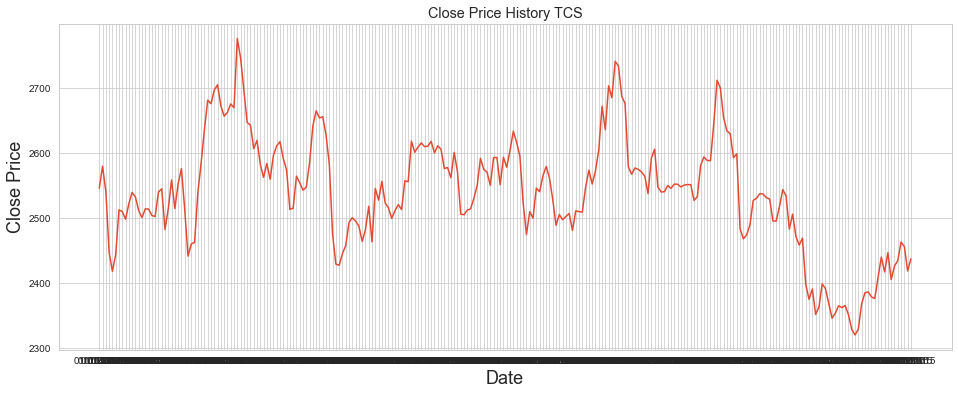

In [187]:
plt.figure(figsize=(16,6))
plt.title('Close Price History TCS')
plt.plot(lstm_tcs_close_df['Date'], lstm_tcs_close_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [188]:
# Create a new dataframe with only the 'TCS DATA Open column 
tcs_close_df = lstm_tcs_close_df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = tcs_close_df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
print(len(dataset))
training_data_len

248


236

In [189]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

len(scaled_data)

248

In [190]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(steps, len(train_data)):
    x_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])
    if i<= steps+1:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.49484875, 0.56915826, 0.48323104])]
[0.2779482683033754]

[array([0.49484875, 0.56915826, 0.48323104]), array([0.56915826, 0.48323104, 0.27794827])]
[0.2779482683033754, 0.21459886014905738]



(233, 3, 1)

In [191]:
# Build the LSTM model
model_lstm_tcs_close = Sequential()
model_lstm_tcs_close.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm_tcs_close.add(LSTM(64, return_sequences=True))
model_lstm_tcs_close.add(LSTM(32, return_sequences=False))
model_lstm_tcs_close.add(Dense(25))
model_lstm_tcs_close.add(Dense(1))

# Compile the model
model_lstm_tcs_close.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm_tcs_close = model_lstm_tcs_close.fit(x_train, y_train, batch_size=40, epochs=40)

Epoch 1/40
6/6 [==============================] - 8s 7ms/step - loss: 0.2445
Epoch 2/40
6/6 [==============================] - 0s 7ms/step - loss: 0.1387
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0458
Epoch 4/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0394
Epoch 5/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0212
Epoch 6/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0243
Epoch 7/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 8/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0204
Epoch 9/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0183
Epoch 10/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0169
Epoch 11/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0159
Epoch 12/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0165
Epoch 13/40
6/6 [==============================] - 0s 7ms/step - loss: 0.

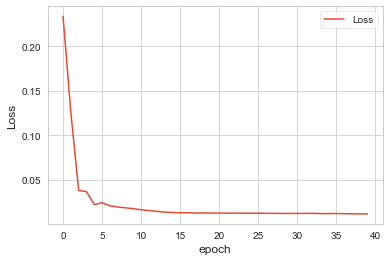

In [192]:
plt.plot(history_lstm_tcs_close.history['loss'], label='Loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [194]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - steps: , :]
# Create the data sets x_test and y_test
x_test = []
print(training_data_len)
print(len(test_data))
y_test = dataset[training_data_len:, :]
print(len(test_data))
for i in range(steps, len(test_data)):
    x_test.append(test_data[i-steps:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
print(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print(x_test.shape)
# Get the models predicted price values 
predictions = model_lstm_tcs_close.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

236
15
15
[[0.14193336 0.14511179 0.12856203]
 [0.14511179 0.12856203 0.12286278]
 [0.12856203 0.12286278 0.19421306]
 [0.12286278 0.19421306 0.26293292]
 [0.19421306 0.26293292 0.21262604]
 [0.26293292 0.21262604 0.27750986]
 [0.21262604 0.27750986 0.18686979]
 [0.27750986 0.18686979 0.23235423]
 [0.18686979 0.23235423 0.25087681]
 [0.23235423 0.25087681 0.31323981]
 [0.25087681 0.31323981 0.29811486]
 [0.31323981 0.29811486 0.21591407]]
(12, 3, 1)


26.06264331142056

In [196]:
tcs_close_predictions = [x.item(0) for x in predictions]

In [197]:
df_forcast_tcs_close_lstm = pd.DataFrame({'Date':tcs_forcast_dates_new, 'Close': tcs_close_predictions})
df_forcast_tcs_close_lstm['Date'] = pd.to_datetime(df_forcast_tcs_close_lstm['Date'])
df_forcast_tcs_close_lstm['Date'] = df_forcast_tcs_close_lstm['Date'].dt.strftime('%d/%m/%Y')
df_forcast_tcs_close_lstm.head()

,Date,Close
0,31/12/2015,2411.622070
1,01/01/2016,2409.953857
2,02/01/2016,2409.822754
3,03/01/2016,2420.781738
4,04/01/2016,2439.750000


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

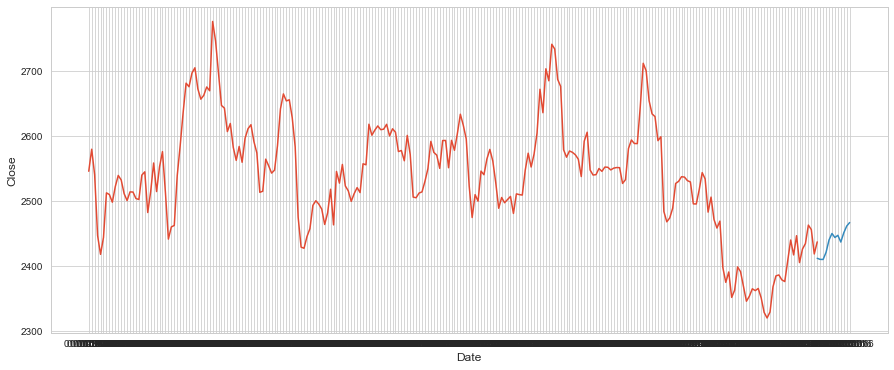

In [198]:
plt.figure(figsize = (15,6))
sns.lineplot(lstm_tcs_close_df['Date'], lstm_tcs_close_df['Close'])
sns.lineplot(df_forcast_tcs_close_lstm['Date'], df_forcast_tcs_close_lstm['Close'])

## Infosys Close price Predictions

In [199]:
lstm_infosys_close_df = original_infosys_close
lstm_infosys_close_df['Date'] = pd.to_datetime(lstm_infosys_close_df['Date'])

<ipython-input-199-7eff84336ddc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_infosys_close_df['Date'] = pd.to_datetime(lstm_infosys_close_df['Date'])


In [201]:
lstm_infosys_close_df['Date'] = lstm_infosys_close_df['Date'].dt.strftime('%d/%m/%Y')

<ipython-input-201-217ae58509d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_infosys_close_df['Date'] = lstm_infosys_close_df['Date'].dt.strftime('%d/%m/%Y')


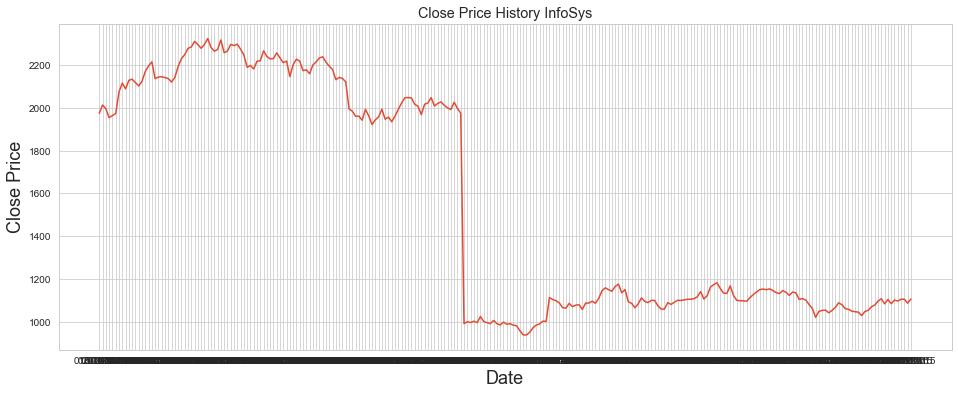

In [202]:
plt.figure(figsize=(16,6))
plt.title('Close Price History InfoSys')
plt.plot(lstm_infosys_close_df['Date'], lstm_infosys_close_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [203]:
# Create a new dataframe with only the 'TCS DATA Open column 
infosys_close_df = lstm_infosys_close_df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = infosys_close_df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
print(len(dataset))
training_data_len

248


236

In [204]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

len(scaled_data)

248

In [205]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(steps, len(train_data)):
    x_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])
    if i<= steps+1:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.74747693, 0.77544694, 0.76297578])]
[0.732915224913495]

[array([0.74747693, 0.77544694, 0.76297578]), array([0.77544694, 0.76297578, 0.73291522])]
[0.732915224913495, 0.7396554209919263]



(233, 3, 1)

In [206]:
# Build the LSTM model
model_lstm_infosys_close = Sequential()
model_lstm_infosys_close.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm_infosys_close.add(LSTM(64, return_sequences=True))
model_lstm_infosys_close.add(LSTM(32, return_sequences=False))
model_lstm_infosys_close.add(Dense(25))
model_lstm_infosys_close.add(Dense(1))

# Compile the model
model_lstm_infosys_close.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm_infosys_close = model_lstm_infosys_close.fit(x_train, y_train, batch_size=40, epochs=40)

Epoch 1/40
6/6 [==============================] - 8s 7ms/step - loss: 0.3215
Epoch 2/40
6/6 [==============================] - 0s 7ms/step - loss: 0.2216
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0878
Epoch 4/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0778
Epoch 5/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0437
Epoch 6/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0352
Epoch 7/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0180
Epoch 8/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 9/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 10/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0045
Epoch 11/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 12/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 13/40
6/6 [==============================] - 0s 7ms/step - loss: 0.

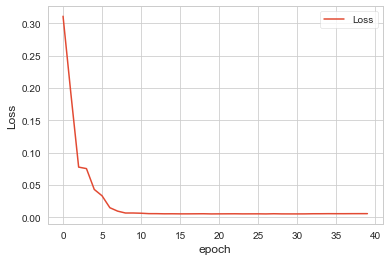

In [207]:
plt.plot(history_lstm_infosys_close.history['loss'], label='Loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [208]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - steps: , :]
# Create the data sets x_test and y_test
x_test = []
print(training_data_len)
print(len(test_data))
y_test = dataset[training_data_len:, :]
print(len(test_data))
for i in range(steps, len(test_data)):
    x_test.append(test_data[i-steps:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
print(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print(x_test.shape)
# Get the models predicted price values 
predictions = model_lstm_tcs_close.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

236
15
15
[[0.07918829 0.08311707 0.09515571]
 [0.08311707 0.09515571 0.10095877]
 [0.09515571 0.10095877 0.11415081]
 [0.10095877 0.11415081 0.12226067]
 [0.11415081 0.12226067 0.10499567]
 [0.12226067 0.10499567 0.11962947]
 [0.10499567 0.11962947 0.1054282 ]
 [0.11962947 0.1054282  0.11775519]
 [0.1054282  0.11775519 0.11451125]
 [0.11775519 0.11451125 0.12056661]
 [0.11451125 0.12056661 0.12053057]
 [0.12056661 0.12053057 0.10726644]]
(12, 3, 1)


87.28346604562327

In [210]:
infosys_close_predictions = [x.item(0) for x in predictions]

In [211]:
infosys_Dates = infosys_data['Date']
infosys_future_dates_new = pd.date_range(list(infosys_Dates)[-1], periods=12, freq='1d')
infosys_forcast_dates_new = []
for time_i in infosys_future_dates_new:
    infosys_forcast_dates_new.append(time_i.date())

In [212]:
df_forcast_infosys_close_lstm = pd.DataFrame({'Date':infosys_forcast_dates_new, 'Close': infosys_close_predictions})
df_forcast_infosys_close_lstm['Date'] = pd.to_datetime(df_forcast_infosys_close_lstm['Date'])
df_forcast_infosys_close_lstm['Date'] = df_forcast_infosys_close_lstm['Date'].dt.strftime('%d/%m/%Y')
df_forcast_infosys_close_lstm.head()

,Date,Close
0,31/12/2015,1155.301880
1,01/01/2016,1162.529541
2,02/01/2016,1173.082520
3,03/01/2016,1182.143311
4,04/01/2016,1189.689453


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

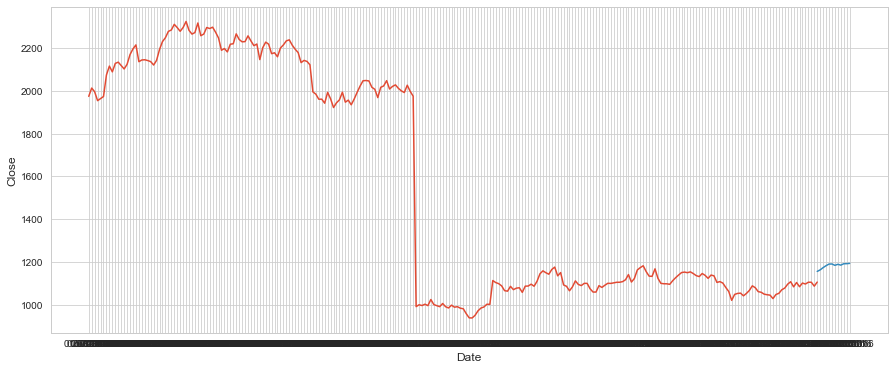

In [213]:
plt.figure(figsize = (15,6))
sns.lineplot(lstm_infosys_close_df['Date'], lstm_infosys_close_df['Close'])
sns.lineplot(df_forcast_infosys_close_lstm['Date'], df_forcast_infosys_close_lstm['Close'])

## Infosys Open Price Predictions

In [214]:
lstm_infosys_open_df = original_infosys_open
lstm_infosys_open_df['Date'] = pd.to_datetime(lstm_infosys_open_df['Date'])

<ipython-input-214-be6aa623da7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_infosys_open_df['Date'] = pd.to_datetime(lstm_infosys_open_df['Date'])


In [215]:
lstm_infosys_open_df['Date'] = lstm_infosys_open_df['Date'].dt.strftime('%d/%m/%Y')

<ipython-input-215-51261fe1991d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_infosys_open_df['Date'] = lstm_infosys_open_df['Date'].dt.strftime('%d/%m/%Y')


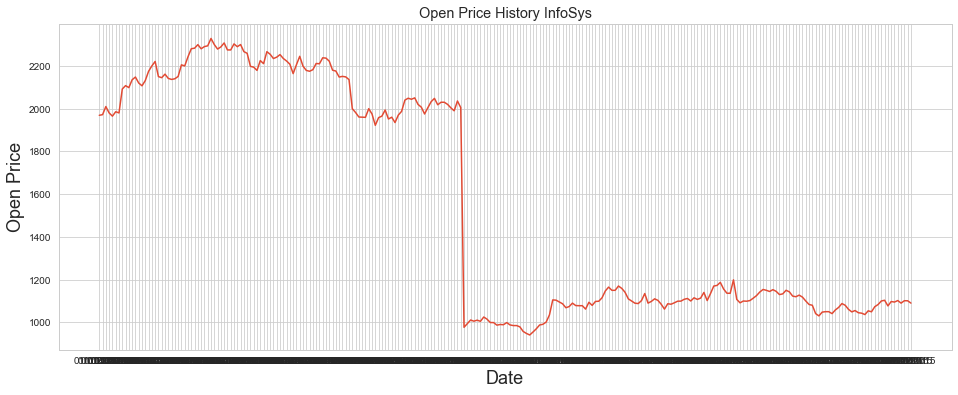

In [216]:
plt.figure(figsize=(16,6))
plt.title('Open Price History InfoSys')
plt.plot(lstm_infosys_open_df['Date'], lstm_infosys_open_df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price', fontsize=18)
plt.show()

In [217]:
# Create a new dataframe with only the 'TCS DATA Open column 
infosys_open_df = lstm_infosys_open_df.filter(['Open'])
# Convert the dataframe to a numpy array
dataset = infosys_open_df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
print(len(dataset))
training_data_len

248


236

In [218]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

len(scaled_data)

248

In [219]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(steps, len(train_data)):
    x_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])
    if i<= steps+1:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.74086486, 0.74306306, 0.77037838])]
[0.748828828828829]

[array([0.74086486, 0.74306306, 0.77037838]), array([0.74306306, 0.77037838, 0.74882883])]
[0.748828828828829, 0.738018018018018]



(233, 3, 1)

In [220]:
# Build the LSTM model
model_lstm_infosys_open = Sequential()
model_lstm_infosys_open.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm_infosys_open.add(LSTM(64, return_sequences=True))
model_lstm_infosys_open.add(LSTM(32, return_sequences=False))
model_lstm_infosys_open.add(Dense(25))
model_lstm_infosys_open.add(Dense(1))

# Compile the model
model_lstm_infosys_open.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm_infosys_open = model_lstm_infosys_open.fit(x_train, y_train, batch_size=40, epochs=40)

Epoch 1/40
6/6 [==============================] - 6s 6ms/step - loss: 0.3444
Epoch 2/40
6/6 [==============================] - 0s 7ms/step - loss: 0.2007
Epoch 3/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0818
Epoch 4/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0736
Epoch 5/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0447
Epoch 6/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0377
Epoch 7/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0163
Epoch 8/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0153
Epoch 9/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0085
Epoch 10/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 11/40
6/6 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 12/40
6/6 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 13/40
6/6 [==============================] - 0s 8ms/step - loss: 0.

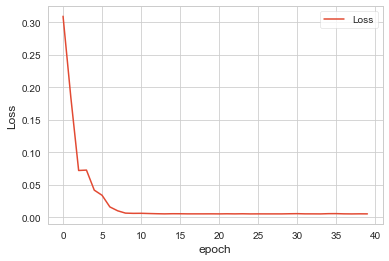

In [221]:
plt.plot(history_lstm_infosys_open.history['loss'], label='Loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [222]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - steps: , :]
# Create the data sets x_test and y_test
x_test = []
print(training_data_len)
print(len(test_data))
y_test = dataset[training_data_len:, :]
print(len(test_data))
for i in range(steps, len(test_data)):
    x_test.append(test_data[i-steps:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
print(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print(x_test.shape)
# Get the models predicted price values 
predictions = model_lstm_tcs_close.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

236
15
15
[[0.0689009  0.08144144 0.0781982 ]
 [0.08144144 0.0781982  0.09531532]
 [0.0781982  0.09531532 0.10263063]
 [0.09531532 0.10263063 0.11459459]
 [0.10263063 0.11459459 0.11704505]
 [0.11459459 0.11704505 0.09801802]
 [0.11704505 0.09801802 0.11275676]
 [0.09801802 0.11275676 0.11102703]
 [0.11275676 0.11102703 0.11607207]
 [0.11102703 0.11607207 0.10738739]
 [0.11607207 0.10738739 0.1154955 ]
 [0.10738739 0.1154955  0.11538739]]
(12, 3, 1)


87.59708597324659

In [223]:
infosys_open_predictions = [x.item(0) for x in predictions]

In [226]:
df_forcast_infosys_open_lstm = pd.DataFrame({'Date':infosys_forcast_dates_new, 'Open': infosys_open_predictions})
df_forcast_infosys_open_lstm['Date'] = pd.to_datetime(df_forcast_infosys_open_lstm['Date'])
df_forcast_infosys_open_lstm['Date'] = df_forcast_infosys_open_lstm['Date'].dt.strftime('%d/%m/%Y')
df_forcast_infosys_open_lstm.head()

,Date,Open
0,31/12/2015,1150.217285
1,01/01/2016,1158.362793
2,02/01/2016,1163.704712
3,03/01/2016,1177.379395
4,04/01/2016,1185.994385


C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kaushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

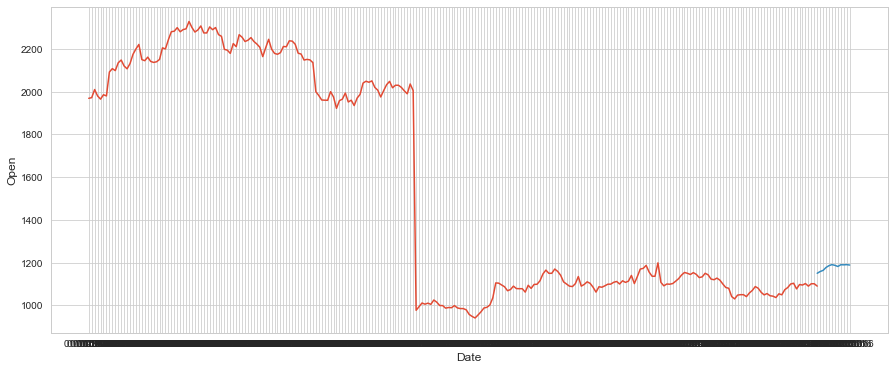

In [227]:
plt.figure(figsize = (15,6))
sns.lineplot(lstm_infosys_open_df['Date'], lstm_infosys_open_df['Open'])
sns.lineplot(df_forcast_infosys_open_lstm['Date'], df_forcast_infosys_open_lstm['Open'])

## MLP with TCS Open Price Prediction

In [260]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(tcs_open_df.values)

len(scaled_data)

248

In [265]:
scaled_data

array([[0.52838242],
       [0.49423816],
       [0.55825864],
       [0.4475032 ],
       [0.32138284],
       [0.26248399],
       [0.2893726 ],
       [0.4216816 ],
       [0.42808365],
       [0.41954759],
       [0.45582586],
       [0.47865984],
       [0.46222791],
       [0.42808365],
       [0.43235169],
       [0.4206146 ],
       [0.41527956],
       [0.41175843],
       [0.39180538],
       [0.46649595],
       [0.51493811],
       [0.34699104],
       [0.41026462],
       [0.53051643],
       [0.42808365],
       [0.49850619],
       [0.51664533],
       [0.40674349],
       [0.2894793 ],
       [0.3422962 ],
       [0.32138284],
       [0.5134443 ],
       [0.56690141],
       [0.67562953],
       [0.80964575],
       [0.7503201 ],
       [0.79940248],
       [0.83354673],
       [0.76739223],
       [0.72567222],
       [0.7631242 ],
       [0.76888604],
       [0.77379428],
       [1.        ],
       [0.91890738],
       [0.6841656 ],
       [0.70315834],
       [0.688

In [281]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(steps, len(train_data)):
    x_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])
    if i<= steps+1:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)


[array([0.52838242, 0.49423816, 0.55825864])]
[0.44750320102432806]

[array([0.52838242, 0.49423816, 0.55825864]), array([0.49423816, 0.55825864, 0.4475032 ])]
[0.44750320102432806, 0.32138284250960325]



In [282]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - steps: , :]
# Create the data sets x_test and y_test
x_test = []
print(training_data_len)
print(len(test_data))
y_test = dataset[training_data_len:, :]
print(len(test_data))
for i in range(steps, len(test_data)):
    x_test.append(test_data[i-steps:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
print(x_test)

236
15
15
[[0.1058472  0.13572343 0.03371746]
 [0.13572343 0.03371746 0.12601366]
 [0.03371746 0.12601366 0.13785745]
 [0.12601366 0.13785745 0.20401195]
 [0.13785745 0.20401195 0.21468203]
 [0.20401195 0.21468203 0.21457533]
 [0.21468203 0.21457533 0.25736236]
 [0.21457533 0.25736236 0.20401195]
 [0.25736236 0.20401195 0.21681605]
 [0.20401195 0.21681605 0.23175416]
 [0.21681605 0.23175416 0.29652155]
 [0.23175416 0.29652155 0.28521127]]


In [284]:
y_test.shape

(12, 1)

In [300]:
from keras.layers import Dense, Activation, Dropout

# Parameters
batch_size = 128 # It is the sample size of inputs to be processed at each training stage. 
hidden_units = 256
dropout = 0.45
input_size = steps
num_labels = 1

# Nossa  MLP com ReLU e Dropout 
model = Sequential()

model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               1024      
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)               

In [301]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [277]:
history_mlp_tcs_open = model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
2/2 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - accuracy: 0.0055
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0055
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0055
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0055
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0029
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0055
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0055
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0055
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0055
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.002

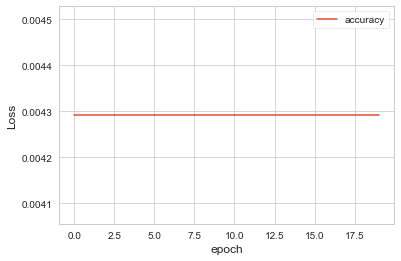

In [280]:
plt.plot(history_mlp_tcs_open.history['accuracy'], label='accuracy')
# plt.plot(history_mlp_tcs_open.history['loss'], label='loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [285]:
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("nAccuracy: %.1f%%n" % (100.0 * acc))

nAccuracy: 0.0%n


In [302]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [303]:
data = tcs_data.filter(['Open'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.90 ))
print('Training data Length', training_data_len)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training_data_len), :]

Training data Length 224


In [304]:
X_train = []
y_train = []
steps = 3
# We are taking predicting the open price of a given day based on the trend in the previous 60 days
for i in range(steps, len(train_data)):
    X_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])

# Convert the self.X_train and self.y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)
test_data = scaled_data[training_data_len - steps: , :]
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(steps, len(test_data)):
    X_test.append(test_data[i-steps:i, 0])
X_test = np.array(X_test)
test_dates = tcs_data['Date'].values
testd = test_dates[training_data_len:] # stores the test dates

Multilayer perceptron (MLP)
R2 SCORE
0.6687874256965237
['MLP', 0.6687874256965237]
MSLE
9.293958383679727e-05


Text(0.5, 1.0, 'MLP')

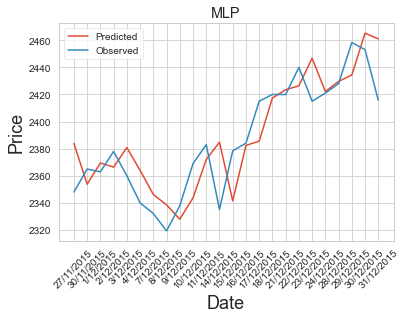

In [305]:
print("Multilayer perceptron (MLP)")
# We are using MLPRegressor as the problem at hand is a regression problem
regr = MLPRegressor(hidden_layer_sizes = 100, alpha = 0.01,solver = 'lbfgs',shuffle=True)
regr.fit(X_train, y_train)
# predicting the price
y_pred = regr.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred = scaler.inverse_transform(y_pred)
print("R2 SCORE")
print(metrics.r2_score(y_test, y_pred))
print(["MLP", metrics.r2_score(y_test, y_pred)])
print("MSLE")
print(metrics.mean_squared_log_error(y_test, y_pred))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Observed"])
plt.xticks( range(0,len(y_test)), labels=testd.tolist(),rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title("MLP")

## TCS Close price Prediction

In [306]:
data = tcs_data.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.90 ))
print('Training data Length', training_data_len)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training_data_len), :]

Training data Length 224


In [307]:
X_train = []
y_train = []
steps = 3
# We are taking predicting the open price of a given day based on the trend in the previous 60 days
for i in range(steps, len(train_data)):
    X_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])

# Convert the self.X_train and self.y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)
test_data = scaled_data[training_data_len - steps: , :]
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(steps, len(test_data)):
    X_test.append(test_data[i-steps:i, 0])
X_test = np.array(X_test)
test_dates = tcs_data['Date'].values
testd = test_dates[training_data_len:] # stores the test dates

R2 SCORE
0.6662675160533325
['MLP', 0.6662675160533325]
MSLE
9.826123487193175e-05


C:\Users\Kaushal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0.5, 1.0, 'MLP')

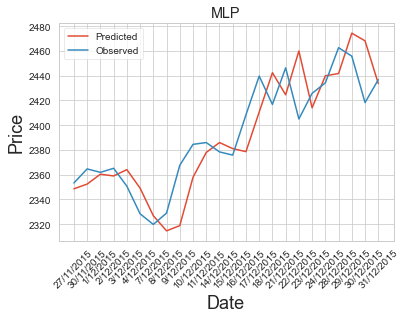

In [308]:
regr = MLPRegressor(hidden_layer_sizes = 100, alpha = 0.01,solver = 'lbfgs',shuffle=True)
regr.fit(X_train, y_train)
# predicting the price
y_pred = regr.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred = scaler.inverse_transform(y_pred)
print("R2 SCORE")
print(metrics.r2_score(y_test, y_pred))
print(["MLP", metrics.r2_score(y_test, y_pred)])
print("MSLE")
print(metrics.mean_squared_log_error(y_test, y_pred))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Observed"])
plt.xticks( range(0,len(y_test)), labels=testd.tolist(),rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title("MLP")

## Infosys MLP Prediction For Close Price 

In [309]:
data = infosys_data.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.90 ))
print('Training data Length', training_data_len)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training_data_len), :]

Training data Length 224


In [310]:
X_train = []
y_train = []
steps = 3
# We are taking predicting the open price of a given day based on the trend in the previous 60 days
for i in range(steps, len(train_data)):
    X_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])

# Convert the self.X_train and self.y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)
test_data = scaled_data[training_data_len - steps: , :]
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(steps, len(test_data)):
    X_test.append(test_data[i-steps:i, 0])
X_test = np.array(X_test)
test_dates = tcs_data['Date'].values
testd = test_dates[training_data_len:] # stores the test dates

R2 SCORE
0.6259521227434953
['MLP', 0.6259521227434953]
MSLE
0.00017352968308755482


Text(0.5, 1.0, 'MLP')

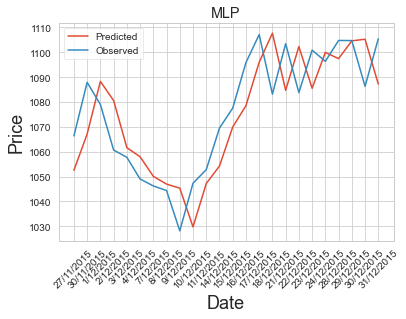

In [311]:
regr = MLPRegressor(hidden_layer_sizes = 100, alpha = 0.01,solver = 'lbfgs',shuffle=True)
regr.fit(X_train, y_train)
# predicting the price
y_pred = regr.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred = scaler.inverse_transform(y_pred)
print("R2 SCORE")
print(metrics.r2_score(y_test, y_pred))
print(["MLP", metrics.r2_score(y_test, y_pred)])
print("MSLE")
print(metrics.mean_squared_log_error(y_test, y_pred))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Observed"])
plt.xticks( range(0,len(y_test)), labels=testd.tolist(),rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title("MLP")

## Open Price Infosys Data

In [312]:
data = infosys_data.filter(['Open'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.90 ))
print('Training data Length', training_data_len)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training_data_len), :]

Training data Length 224


In [313]:
X_train = []
y_train = []
steps = 3
# We are taking predicting the open price of a given day based on the trend in the previous 60 days
for i in range(steps, len(train_data)):
    X_train.append(train_data[i-steps:i, 0])
    y_train.append(train_data[i, 0])

# Convert the self.X_train and self.y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)
test_data = scaled_data[training_data_len - steps: , :]
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(steps, len(test_data)):
    X_test.append(test_data[i-steps:i, 0])
X_test = np.array(X_test)
test_dates = tcs_data['Date'].values
testd = test_dates[training_data_len:] # stores the test dates

R2 SCORE
0.6420639069257357
['MLP', 0.6420639069257357]
MSLE
0.0001448440306885956


Text(0.5, 1.0, 'MLP')

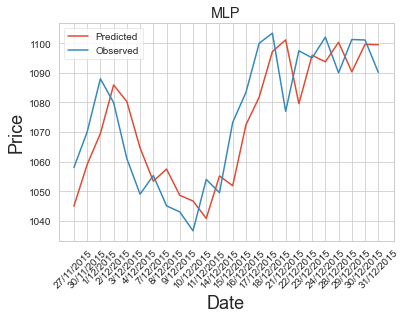

In [314]:
regr = MLPRegressor(hidden_layer_sizes = 100, alpha = 0.01,solver = 'lbfgs',shuffle=True)
regr.fit(X_train, y_train)
# predicting the price
y_pred = regr.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred = scaler.inverse_transform(y_pred)
print("R2 SCORE")
print(metrics.r2_score(y_test, y_pred))
print(["MLP", metrics.r2_score(y_test, y_pred)])
print("MSLE")
print(metrics.mean_squared_log_error(y_test, y_pred))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Observed"])
plt.xticks( range(0,len(y_test)), labels=testd.tolist(),rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title("MLP")

## Nifty Index Open Price Prediction

In [315]:
data = nifty_it_data.filter(['Open'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.90 ))
print('Training data Length', training_data_len)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training_data_len), :]

Training data Length 224
